In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
from cloudy_fit_lib import *
from scipy.interpolate import RegularGridInterpolator
import pickle
import corner
from scipy import integrate, interpolate
import emcee

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

In [3]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/cloudy_grids/'

In [4]:
savedir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z=1.09456549/cloudy_fits/'

Species names

In [5]:
ion_list = ['HI', 'HeI', 'CII', 'CIII', 'CIV', 'NII', 'NIII', 'NIV', 'NV',
            'OII', 'OIII', 'OIV', 'OV', 'OVI', 'SiII', 'SiIII', 'SiIV',
            'MgII', 'MgX', 'NeV', 'NeVI', 'NeVIII', 'SIV', 'SV', 'SVI']

Specify density/metallicity grid

In [6]:
log_metals_arr = [-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,-1.0 ,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]
log_hdens_arr = [-4.8,-4.4,-4.2,-4.0,-3.8,-3.6,-3.4,-3.2,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6]
logT_arr = np.arange(4.00, 6.01, 0.01)

Load grids

In [7]:
pkl_file = open(rootdir+'TDP_grid.pkl', 'rb')
logX_dict_TDP_samples = pickle.load(pkl_file)
pkl_file.close()

Set up the 3D grid across metallicity, density, and temperature

In [8]:
logX_dict_TDP_interp = {}

for ion in ion_list:
    logX_dict_TDP_interp[ion] = RegularGridInterpolator((log_metals_arr, log_hdens_arr, logT_arr), 
                                                     logX_dict_TDP_samples[ion])

# Make diagnostics

In [9]:
logN_dict = {'HI':'14.5, -0.1, +0.2',
'HeI':'<13.2',
'CII':'<13.5',
'CIII':'14.4, -0.1, +0.1',
'CIV':'13.96, -0.01, +0.01',
'NII':'<13.5',
'NIV':'13.1, -0.1, +0.1',
'NV':'<13.5',
'OII':'<13.5',
'OIII':'14.22, -0.05, +0.05',
'OIV':'14.67, -0.02, +0.02',
'OV':'14.20, -0.04, +0.04',
'OVI':'13.8, -0.1, +0.1',
'NeVI':'<13.8',
'NeVIII':'<13.8',
'MgII':'<11.4',
'MgX':'<13.9',
'AlII':'<11.2',
'AlIII':'<11.6',
'SiII':'<12.3',
'SiIII':'<12.4',
'SIV':'<13.0',
'SV':'<12.7',
'SVI':'<13.7',
'FeII':'<11.8',}

In [10]:
gen_logN_ratio_str(logN_dict['OIV'], logN_dict['OIII'])

'0.45, -0.05, 0.05'

In [11]:
logN_ratio_dict = {
                   'OIV/OIII': '0.45, -0.05, 0.05',
                   'OV/OIV': '-0.47, -0.04, 0.04',
                   
                  }

#logN_ratio_dict = {'OIV/OIII': '0.38, -0.03, 0.03',
#                   'OV/OIV': '-0.47, -0.05, 0.05',
#                   'OVI/OV': '-0.40, -0.11, 0.11'
#                  }

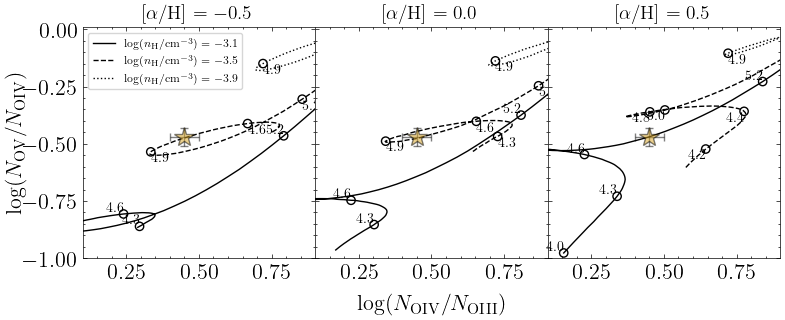

In [121]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[\alpha/H]}=-0.5$', fontsize=14)

scat_logN_ratio(axes[1], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[\alpha/H]}=0.0$', fontsize=14)

scat_logN_ratio(axes[2], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[\alpha/H]}=0.5$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{OV}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -1.0

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -0.5, -3.1, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -0.5, -3.5, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -0.5, -3.9, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.0, -3.1, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.0, -3.5, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.0, -3.9, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.5, -3.1, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.5, -3.5, 
                      4.0, 5.3, .01,
                      4.15, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.5, -3.9, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      ':', 'left', 'top')

axes[0].set_ylim(-1.0,0.01)

plt.savefig(savedir+'z_109_diagnostic.pdf', dpi=300)
plt.savefig(savedir+'z_109_diagnostic.png', dpi=300)

# Fit column densities - two-phase PIE + TDP

Load PIE grid, obtain the UVB grid from FG20

In [15]:
fg20_z_grid, fg20_wav_grid, fg20_J_nu_grid = read_uvb('', 'fg20_galaxy.ascii')

Fetch the SED at $z=1$

In [16]:
z_test = 1

In [17]:
fg20_J_nu_test = fetch_sed(z_test, fg20_z_grid, fg20_J_nu_grid)

Specify $N_{\mathrm{HI}}$ grid points and get corresponding filenames

In [18]:
logN_HI_min = 12
logN_HI_max = 17
logN_HI_step = 0.25

logN_HI_arr = np.arange(logN_HI_min, logN_HI_max+logN_HI_step, logN_HI_step)

In [19]:
file_list = create_grid_file_list(logN_HI_arr)

Specify grid points for densities and metallicities

In [20]:
log_hdens_min = -5
log_hdens_max = 1
log_hdens_step = 0.25

log_hdens_arr = np.arange(log_hdens_min, log_hdens_max+log_hdens_step, log_hdens_step)
logU_arr = np.log10(calc_U(fg20_wav_grid, fg20_J_nu_test, 10**log_hdens_arr))

In [21]:
log_metals_min = -3
log_metals_max = 1
log_metals_step = 0.25

log_metals_arr = np.arange(log_metals_min, log_metals_max+log_metals_step, log_metals_step)

Load the final grid

In [22]:
pkl_file = open(rootdir+'final_grid.pkl', 'rb')
species_logN_samples = pickle.load(pkl_file)
pkl_file.close()

Interpolate this grid

In [23]:
species_logN_interp = {}

for s in list(species_logN_samples.keys()):
    
    species_logN_samples[s][species_logN_samples[s]==-np.inf] = -99
    
    species_logN_interp[s] = RegularGridInterpolator((logN_HI_arr, log_hdens_arr, log_metals_arr), 
                                                     species_logN_samples[s])

Dictionary of column densities

In [24]:
logN_dict = {'HI':'14.5, -0.1, +0.2',
            'HeI':'<13.2',
            'CII':'<13.5',
            'CIII':'14.4, -0.1, +0.1',
            'CIV':'13.96, -0.01, +0.01',
            'NII':'<13.5',
            'NIV':'13.1, -0.1, +0.1',
            'NV':'<13.5',
            'OII':'<13.5',
            'OIII':'14.22, -0.05, +0.05',
            'OIV':'14.67, -0.02, +0.02',
            'OV':'14.20, -0.04, +0.04',
            'OVI':'<13.8', #'OVI':'13.8, -0.1, +0.1',
            'NeVI':'<13.8',
            #'NeVIII':'<13.8',
            'MgII':'<11.4',
            #'MgX':'<13.9',
            #'AlII':'<11.2',
            #'AlIII':'<11.6',
            'SiII':'<12.3',
            'SiIII':'<12.4',
            'SIV':'<13.0',
            'SV':'<12.7',
            'SVI':'<13.7',}
            #'FeII':'<11.8',}

Test a solution

In [25]:
# Dense PIE phase
logN_HI_test = 14.5
log_hdens_test_p1 = -3.0
log_metals_test_p1 = 0.1
C_O_test_p1 = 0.5
N_O_test_p1 = 0.0

logN_test_p1 = np.array(predict_col_dens(logN_dict, 
                                                 logN_HI_test, 
                                                 log_hdens_test_p1, 
                                                 log_metals_test_p1, 
                                                 species_logN_interp,
                                                 {'C': C_O_test_p1, 'N': N_O_test_p1}))

# Diffuse TDP phase
log_metals_test_p2 = -0.2
log_hdens_test_p2 = -3.7
logT_test_p2 = 4.9
C_O_test_p2 = -2.0
N_O_test_p2 = -2.0
logN_HI_test_p2 = 13.5

logN_test_p2 = predict_col_dens_model_TDP(logN_dict,log_metals_test_p2,log_hdens_test_p2,logT_test_p2,logN_HI_test_p2,logX_dict_TDP_interp,C_O_test_p2,N_O_test_p2)

Total column density yield

In [26]:
logN_test = np.log10(10**logN_test_p1 + 10**logN_test_p2)

Make a test plot

(12.0, 16.0)

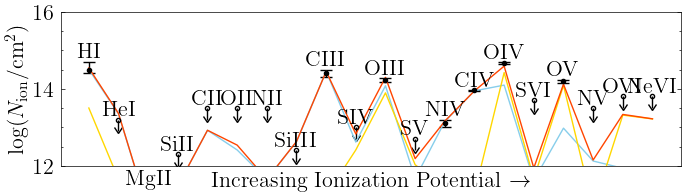

In [27]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax)
ax.plot(np.arange(len(logN_dict)), logN_test_p1, color='skyblue')
ax.plot(np.arange(len(logN_dict)), logN_test_p2, color='gold')
ax.plot(np.arange(len(logN_dict)), logN_test, color='orangered')

ax.set_ylim(12,16)

Attempt to fit

In [28]:
log_metals_arr = [-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,-1.0 ,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]
log_hdens_arr = [-4.8,-4.4,-4.2,-4.0,-3.8,-3.6,-3.4,-3.2,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6]
logT_arr = np.arange(4.00, 6.01, 0.01)

In [29]:
def log_prior_mix(log_metals_p1, log_hdens_p1, C_O_p1, N_O_p1,
                log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2, species_logN_interp, logX_dict_TDP_interp):
        
    logN_HI_obs = 14.5
    
    if log_metals_arr[0]<log_metals_p1<log_metals_arr[-1] and log_metals_arr[0]<log_metals_p2<log_metals_arr[-1]:
        if -3<log_metals_p1+C_O_p1<1 and C_O_p1 < 1.5 and -3<log_metals_p2+C_O_p2<1 and -3<log_metals_p1+N_O_p1<1 and -3<log_metals_p2+N_O_p2<1:
            if log_hdens_arr[0]<log_hdens_p1<log_hdens_arr[-1] and log_hdens_arr[0]<log_hdens_p2<log_hdens_arr[-1]:
                if 4.0<logT_p2<5.8: # Temperature limits based on HI/CIV linewidth
                    if 12.0<logN_HI_p2<logN_HI_obs:
                        if log_hdens_p1>log_hdens_p2: # CIV denser and colder
                            
                            # PIE cloud size
                            logl_p1 = np.log10(get_cloud_size(logN_HI_obs, log_hdens_p1, species_logN_interp, log_metals_p1))
                            # TDP cloud size
                            logl_p2 = get_logl_TDP(log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
                            
                            # Limits for diffuse cloud size
                            logl_p2_S = np.log10(0.03*(10**log_hdens_p2/1e-3)**-1) # in kpc
                            logl_p2_J = np.log10(40*(10**log_hdens_p2/1e-3)**-0.5*(10**logT_p2/1e4)**0.5) # added scaling for temperature
                            
                            if logl_p1<logl_p2 and logl_p2_S<logl_p2<logl_p2_J:
                                
                                # OIII yield
                                logN_OIII_p1 = species_logN_interp['O+2']([logN_HI_obs, log_hdens_p1, log_metals_p1])[0]
                                logN_OIII_p2 = predict_col_dens_TDP('OIII', log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
                                
                                if logN_OIII_p1 > logN_OIII_p2:
                                    return np.log(10**logN_HI_p2) # log10 to linear, then natural log
                                else:
                                    return -np.inf
                            else:
                                return -np.inf
                        else:
                            return -np.inf
                    else:
                        return -np.inf
                else:
                    return -np.inf
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [30]:
def log_likelihood_mix(log_metals_p1, log_hdens_p1, C_O_p1, N_O_p1,
                     log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2,
                     logN_dict, species_logN_interp, logX_dict_TDP_interp):
    
    logN_HI_obs = 14.5 # Measured N(HI) to generate column densities
    
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        # Model side: prediction adjusted for elemental abundance
        s = ion_species_dict[ion] # Species, for PIE
        
        # PIE prediction
        if ion != 'HI':
            y_bar_p1 = species_logN_interp[s]([logN_HI_obs, log_hdens_p1, log_metals_p1])[0]
        else:
            y_bar_p1 = logN_HI_obs
        
        # TDP prediction
        elem = ion_species_dict[ion].split('+')[0] # Element, for TDP
        y_bar_p2 = predict_col_dens_TDP(ion, log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
        
        # Account for non-solar abundance pattern
        if elem == 'C': 
            y_bar_p1 += C_O_p1
            y_bar_p2 += C_O_p2
            
        if elem == 'N':
            y_bar_p1 += N_O_p1
            y_bar_p2 += N_O_p2
          
        y_bar = np.log10(10**y_bar_p1 + 10**y_bar_p2)
            
        # Data side: handle upper limits, lower limits, and measurements separately
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    return ll

In [31]:
def log_probability_mix(params, logN_dict, species_logN_interp, logX_dict_TDP_interp):
    
    log_metals_p1,log_hdens_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2 = params
    
    lp = log_prior_mix(log_metals_p1,log_hdens_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2,species_logN_interp,logX_dict_TDP_interp)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood_mix(log_metals_p1,log_hdens_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2,logN_dict,species_logN_interp,logX_dict_TDP_interp)

MCMC fit

In [32]:
pos = np.array([log_metals_test_p1,log_hdens_test_p1,C_O_test_p1,N_O_test_p1, 
                log_metals_test_p2,log_hdens_test_p2,logT_test_p2,C_O_test_p2,N_O_test_p2,logN_HI_test_p2]) + 1e-4 * np.random.randn(200, 10)
nwalkers, ndim = pos.shape

In [33]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_mix, args=(logN_dict,species_logN_interp,logX_dict_TDP_interp)
)

In [34]:
#sampler.run_mcmc(pos, 1000, progress=True);

In [35]:
#flat_samples_mix = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals_p1','log_hdens_p1','C_O_p1','N_O_p1',
#                                         'log_metals_p2','log_hdens_p2','logT_p2','C_O_p2','N_O_p2','logN_HI_p2'])
#flat_samples_mix.to_csv(savedir+'PIE+TDP.csv', index=False)

flat_samples_mix = pd.read_csv(savedir+'PIE+TDP.csv')

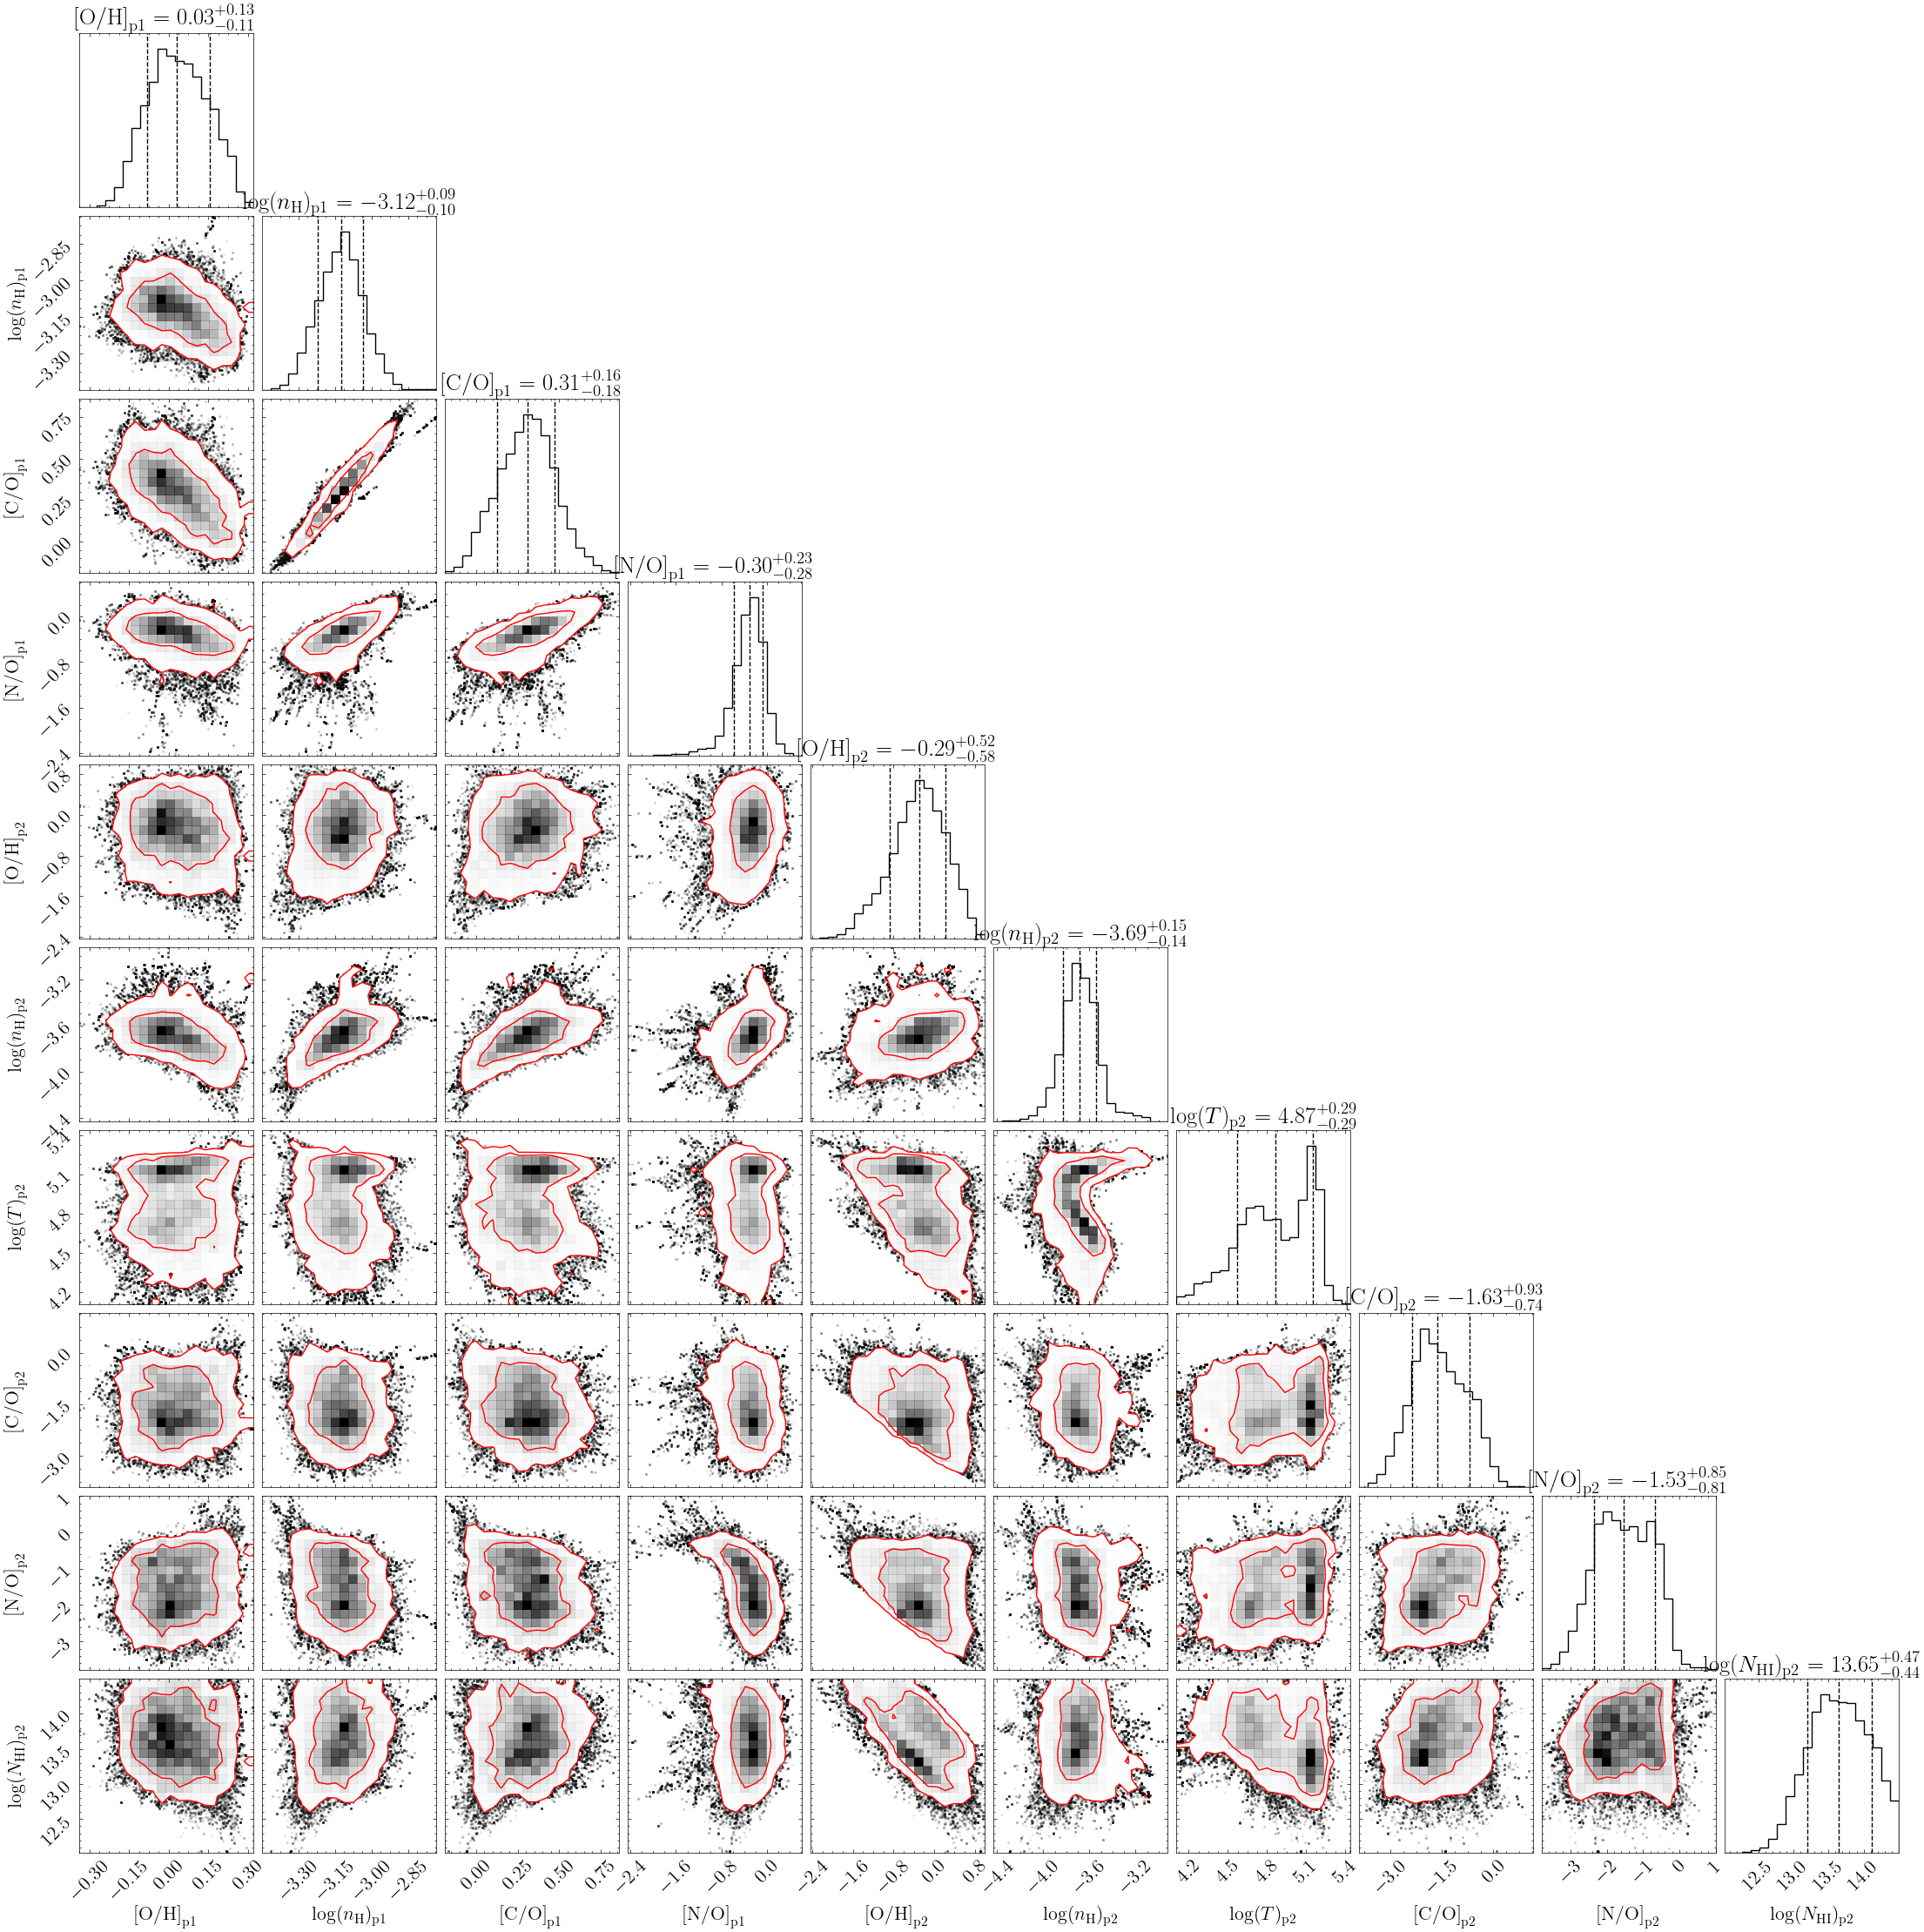

In [36]:
fig = corner.corner(
    flat_samples_mix, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}_\mathrm{p1}$',r'$\log(n_\mathrm{H})_\mathrm{p1}$',r'$\mathrm{[C/O]}_\mathrm{p1}$',r'$\mathrm{[N/O]}_\mathrm{p1}$',
            r'$\mathrm{[O/H]}_\mathrm{p2}$',r'$\log(n_\mathrm{H})_\mathrm{p2}$',r'$\log(T)_\mathrm{p2}$',r'$\mathrm{[C/O]}_\mathrm{p2}$',r'$\mathrm{[N/O]}_\mathrm{p2}$',
            r'$\log(N_\mathrm{HI})_\mathrm{p2}$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

In [37]:
np.percentile(flat_samples_mix['log_hdens_p2'],100*cdf_1sig)-np.median(flat_samples_mix['log_hdens_p2'])

0.14706861210586908

In [91]:
np.percentile(flat_samples_mix['logN_HI_p2'], 100*(1-cdf_3sig)), np.percentile(flat_samples_mix['logN_HI_p2'], 100*cdf_3sig)

(12.440153818059446, 14.494601154370317)

In [92]:
np.percentile(flat_samples_mix['log_metals_p2'], 100*(1-cdf_3sig)), np.percentile(flat_samples_mix['log_metals_p2'], 100*cdf_3sig)

(-2.0434890202532854, 0.9021741345078552)

In [93]:
np.percentile(flat_samples_mix['C_O_p2'], 100*cdf_3sig), np.percentile(flat_samples_mix['N_O_p2'], 100*cdf_3sig)

(0.3610810651152697, 0.6526765289417892)

Make plot

In [73]:
logN_dict = {#'HI':'14.5, -0.1, +0.2',
            'HeI':'<13.2',
            #'CII':'<13.5',
            'CIII':'14.4, -0.1, +0.1',
            'CIV':'13.96, -0.01, +0.01',
            #'NII':'<13.5',
            'NIV':'13.1, -0.1, +0.1',
            #'NV':'<13.5',
            #'OII':'<13.5',
            'OIII':'14.22, -0.05, +0.05',
            'OIV':'14.67, -0.02, +0.02',
            'OV':'14.20, -0.04, +0.04',
            'OVI':'13.8, -0.1, +0.1',
            #'NeVI':'<13.8',
            #'NeVIII':'<13.8',
            #'MgII':'<11.4',
            #'MgX':'<13.9',
            #'AlII':'<11.2',
            #'AlIII':'<11.6',
            #'SiII':'<12.3',
            'SiIII':'<12.4',
            'SIV':'<13.0',
            'SV':'<12.7',
            'SVI':'<13.7',}
            #'FeII':'<11.8',}

In [74]:
b_dict = {'HI':'21, -3, +2',
          'CIII':'18.3, -0.3, +0.3',
          'CIV':'18.3, -0.3, +0.3',
          'NIV':'12, -5, +6',
          'OIII':'25, -4, +4',
          'OIV':'23, -1, +1',
          'OV':'26, -2, +2',
          'OVI':'13, -5, +8'}

In [75]:
# Best-fit model prediction

logN_species_p1_best = predict_col_dens(logN_dict, logN_HI_test, np.median(flat_samples_mix['log_hdens_p1']), 
                                        np.median(flat_samples_mix['log_metals_p1']), 
                                        species_logN_interp, {'C':np.median(flat_samples_mix['C_O_p1']), 
                                                              'N':np.median(flat_samples_mix['N_O_p1'])})
logN_species_p2_best = predict_col_dens_model_TDP(logN_dict,
                                               np.median(flat_samples_mix['log_metals_p2']),
                                               np.median(flat_samples_mix['log_hdens_p2']),
                                               np.median(flat_samples_mix['logT_p2']),
                                               np.median(flat_samples_mix['logN_HI_p2']),
                                               logX_dict_TDP_interp,
                                               np.median(flat_samples_mix['C_O_p2']),
                                               np.median(flat_samples_mix['N_O_p2']))

logN_species_best = np.log10(10**logN_species_p1_best + 10**logN_species_p2_best)

In [76]:
logN_res_dict = get_logN_residuals(logN_dict, logN_species_best)

In [83]:
logN_res_up = {k:'<0.9' for k in list(logN_res_dict.keys())}

#logN_res_up['SiII'] = '<0.5'
#logN_res_up['OII'] = '<0.5'
#logN_res_up['NV'] = '<0.5'
logN_res_up['SVI'] = '<0.6'

In [84]:
# Model curves for each step
logN_species_p1_grid = predict_col_dens(logN_dict, logN_HI_test, flat_samples_mix['log_hdens_p1'], 
                                        flat_samples_mix['log_metals_p1'], 
                                        species_logN_interp, 
                                        {'C':flat_samples_mix['C_O_p1'], 'N':flat_samples_mix['N_O_p1']})

logN_species_p2_grid = np.zeros(logN_species_p1_grid.shape)

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    
    if ion in list(logN_dict.keys()):
        s = ion_species_dict[ion] # Species, for PIE
        elem = ion_species_dict[ion].split('+')[0] # Element, for non-solar abundances
        
        logN_species_p2_grid[ctr,:] = predict_col_dens_TDP(ion, 
                                           flat_samples_mix['log_metals_p2'],
                                           flat_samples_mix['log_hdens_p2'],
                                           flat_samples_mix['logT_p2'],
                                           flat_samples_mix['logN_HI_p2'],
                                           logX_dict_TDP_interp)
        
        if elem == 'C':
            logN_species_p2_grid[ctr,:] += flat_samples_mix['C_O_p2']
            
        if elem == 'N':
            logN_species_p2_grid[ctr,:] += flat_samples_mix['N_O_p2']
            
        ctr += 1

logN_species_grid = np.log10(10**logN_species_p1_grid + 10**logN_species_p2_grid)

In [85]:
# Draws within 1-sigma of well-constrained values

filtered = []

log_hdens_p1_lo = np.percentile(flat_samples_mix['log_hdens_p1'], 100*(1-cdf_1sig))
log_hdens_p1_hi = np.percentile(flat_samples_mix['log_hdens_p1'], 100*cdf_1sig)

log_metals_p1_lo = np.percentile(flat_samples_mix['log_metals_p1'], 100*(1-cdf_1sig))
log_metals_p1_hi = np.percentile(flat_samples_mix['log_metals_p1'], 100*cdf_1sig)

C_O_p1_lo = np.percentile(flat_samples_mix['C_O_p1'], 100*(1-cdf_1sig))
C_O_p1_hi = np.percentile(flat_samples_mix['C_O_p1'], 100*cdf_1sig)

N_O_p1_lo = np.percentile(flat_samples_mix['N_O_p1'], 100*(1-cdf_1sig))
N_O_p1_hi = np.percentile(flat_samples_mix['N_O_p1'], 100*cdf_1sig)

log_hdens_p2_lo = np.percentile(flat_samples_mix['log_hdens_p2'], 100*(1-cdf_1sig))
log_hdens_p2_hi = np.percentile(flat_samples_mix['log_hdens_p2'], 100*cdf_1sig)

for i in range(len(flat_samples_mix)):
    log_hdens_p1 = flat_samples_mix['log_hdens_p1'][i]
    log_metals_p1 = flat_samples_mix['log_metals_p1'][i]
    C_O_p1 = flat_samples_mix['C_O_p1'][i]
    N_O_p1 = flat_samples_mix['N_O_p1'][i]
    log_hdens_p2 = flat_samples_mix['log_hdens_p2'][i]
    
    if log_hdens_p1_lo<log_hdens_p1<log_hdens_p1_hi and log_metals_p1_lo<log_metals_p1<log_metals_p1_hi and C_O_p1_lo<C_O_p1<C_O_p1_hi and N_O_p1_lo<N_O_p1<N_O_p1_hi and log_hdens_p2_lo<log_hdens_p2<log_hdens_p2_hi:
        filtered.append(i)
        
plot_idx = np.random.randint(0, len(filtered), 50)

In [86]:
import matplotlib.lines as mlines

In [87]:
z_sys = 1.09456549

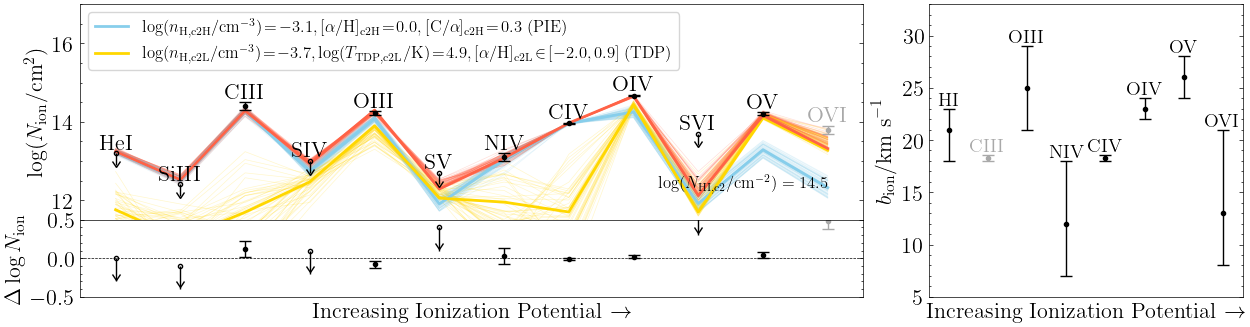

In [120]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                               figsize=(15,3.8), gridspec_kw={'height_ratios': [2.8,1], 'width_ratios': [2.5, 1]})

for idx in plot_idx:
    axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_p1_grid[:,filtered[idx]], color='skyblue', lw=.5, alpha=.2)
    axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_p2_grid[:,filtered[idx]], color='gold', lw=.5, alpha=.2)
    axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_grid[:,filtered[idx]], color='tomato', lw=.5, alpha=.2)
    
axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_p1_best, color='skyblue', lw=2)
axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_p2_best, color='gold', lw=2)
axd['upper left'].plot(np.arange(len(logN_dict)), logN_species_best, color='tomato', lw=2)


plot_column_densities_obs(logN_dict, fig, axd['upper left'],
                          gray_out = ['OVI', 'NeVI', 'NeVIII'])

axd['upper left'].set_ylim(11.5,17.)

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, 
              label=r'$\log(n_\mathrm{H, c2H}/\mathrm{cm}^{-3}) \!=\! -3.1, \mathrm{[\alpha/H]_{c2H}}\!=\!0.0, \mathrm{[C/\alpha]_{c2H}}\!=\!0.3$ (PIE)'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c2L}/\mathrm{cm}^{-3})\!=\!-3.7, \log(T_\mathrm{TDP,c2L}/\mathrm{K})\!=\!4.9, \mathrm{[\alpha/H]_{c2L}}\!\in\![-2.0,0.9]$ (TDP)'))
    
axd['upper left'].text(len(logN_dict)-1, 12.3, r'$\log(N_\mathrm{HI, c2}/\mathrm{cm}^{-2}) = 14.5$', fontsize=12,
            horizontalalignment='right')

axd['upper left'].legend(handles=handles, loc='upper left', fontsize=12, ncol=1)

plot_column_densities_obs(logN_res_dict, fig, axd['lower left'], gray_out = ['OVI', 'NeVI'], label_ions=False, dy=.2)
plot_column_densities_obs(logN_res_up, fig, axd['lower left'], gray_out = ['OVI', 'NeVI'], label_ions=False, dy=.2)

axd['lower left'].set_ylim(-.5,.5)
axd['lower left'].axhline(0, linestyle='--', lw=.5)
axd['lower left'].set_ylabel(r'$\Delta \log N_\mathrm{ion}$')

plot_linewidth_obs(b_dict, fig, axd['right'], fs=14, gray_out=['CIII'])
axd['right'].set_xlim(-0.5, len(b_dict)-1+0.5)
axd['right'].set_ylim(5,33)

plt.subplots_adjust(wspace=0.12, hspace=0) 

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_PIE+TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_PIE+TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

In [101]:
logl_p1 = np.log10(get_cloud_size(logN_HI_test, flat_samples_mix['log_hdens_p1'], species_logN_interp, 
                                  flat_samples_mix['log_metals_p1'])) # PIE
logl_p2 = get_logl_TDP(flat_samples_mix['log_metals_p2'], flat_samples_mix['log_hdens_p2'], 
                       flat_samples_mix['logT_p2'], flat_samples_mix['logN_HI_p2'], logX_dict_TDP_interp) # TDP

Text(0.5, 0, '$\\log(l_\\mathrm{p1}/\\mathrm{kpc})$')

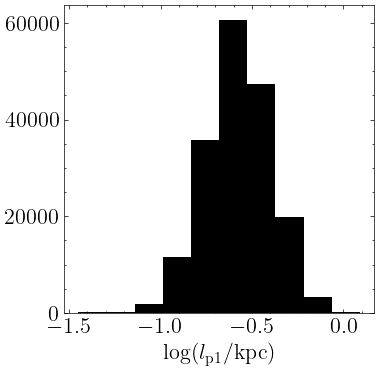

In [102]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl_p1)
ax.set_xlabel(r'$\log(l_\mathrm{p1}/\mathrm{kpc})$')

In [103]:
get_quantiles(logl_p1)

-0.57 -0.18 0.18


(array([ 2492., 16849., 35274., 47429., 40192., 20789., 12005.,  5156.,
          860.,   154.]),
 array([-0.7913186 , -0.43074031, -0.07016202,  0.29041627,  0.65099456,
         1.01157285,  1.37215114,  1.73272943,  2.09330772,  2.45388601,
         2.81446431]),
 <BarContainer object of 10 artists>)

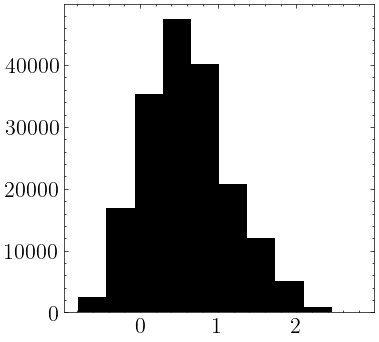

In [104]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl_p2)

In [105]:
get_quantiles(logl_p2)

0.57 -0.53 0.6


In [106]:
np.percentile(logl_p2, 100*(1-cdf_3sig)), np.percentile(logl_p2, 100*cdf_3sig)

(-0.6036259410447733, 2.3910389207283806)

In [108]:
np.log10(0.03*(10**-3.7/10**-3)**-1),np.log10(40*(10**-3.7/1e-3)**-0.5*(10**4.9/1e4)**0.5)

(-0.8228787452803373, 2.4020599913279628)

# DRAFT

# Load models

In [10]:
T_grid_TDP = {}
X_dict_TDP_hyd = {}
X_dict_TDP_carb = {}
X_dict_TDP_nit = {}
X_dict_TDP_oxy = {}

In [11]:
# log_metals=0
k = ('isochoric','fg20',1,0.0,-3.3,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

k = ('isochoric','fg20',1,0.0,-3.5,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

k = ('isochoric','fg20',1,0.0,-3.7,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

# log_metals=-0.5
k = ('isochoric','fg20',1,-0.5,-3.3,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

k = ('isochoric','fg20',1,-0.5,-3.5,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

k = ('isochoric','fg20',1,-0.5,-3.7,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

# log_metals=-1
k = ('isochoric','fg20',1,-1.0,-3.3,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

k = ('isochoric','fg20',1,-1.0,-3.5,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

k = ('isochoric','fg20',1,-1.0,-3.7,3e6)
T_grid_TDP[k], X_dict_TDP_hyd[k], X_dict_TDP_carb[k], X_dict_TDP_nit[k], X_dict_TDP_oxy[k] = get_TDP_frac(k)

## OIV, OV, OVI

Text(-0.67, -0.95, '$\\log (n_\\mathrm{H}/\\mathrm{cm}^{-3}) = -3.5$')

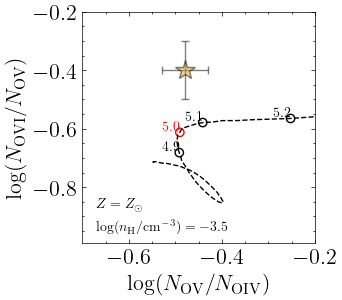

In [13]:
fig, ax = plt.subplots(1, figsize=(3,3))

k = ('isochoric','fg20',1,0,-3.5,3e6)
ax.plot(np.log10(X_dict_TDP_oxy[k]['OV']/X_dict_TDP_oxy[k]['OIV']), 
             np.log10(X_dict_TDP_oxy[k]['OVI']/X_dict_TDP_oxy[k]['OV']), color='black', linestyle='--',
             label=r'$\log (n_\mathrm{H}/\mathrm{cm}^{-3}) = -3.5$')

for logT in np.arange(4.9,5.3,.1):
    
    idx = np.argmin(np.abs(10**logT-T_grid_TDP[k]))
    
    x = np.log10(X_dict_TDP_oxy[k]['OV']/X_dict_TDP_oxy[k]['OIV'])[idx]
    y = np.log10(X_dict_TDP_oxy[k]['OVI']/X_dict_TDP_oxy[k]['OV'])[idx]
    s = str(np.round(np.log10(T_grid_TDP[k][idx]),1))

    if -0.7<x<-0.01 and -0.99<y<-0.2:
        if s=='5.0':
            c='red'
        else:
            c='black'
        ax.scatter(x, y, color=c, facecolor='none')
        ax.text(x,y,s, fontsize=10, horizontalalignment='right', verticalalignment='bottom', color=c)

ax.errorbar(-0.48, -0.4, xerr=0.05,yerr=0.1,
                 marker='*', markersize=15, markerfacecolor='goldenrod', capsize=3, alpha=.5)

ax.set_xlim(-0.7,-0.2)
ax.set_ylim(-0.99,-0.2)

ax.set_xlabel(r'$\log(N_\mathrm{OV}/N_\mathrm{OIV})$')
ax.set_ylabel(r'$\log(N_\mathrm{OVI}/N_\mathrm{OV})$')

ax.text(-0.67,-0.87, r'$Z=Z_\odot$', fontsize=10,horizontalalignment='left')
ax.text(-0.67,-0.95, r'$\log (n_\mathrm{H}/\mathrm{cm}^{-3}) = -3.5$', fontsize=10, horizontalalignment='left')

#plt.savefig(rootdir+'Figures/z_109_diagnostic2.pdf',dpi=300)
#plt.savefig(rootdir+'Figures/z_109_diagnostic2.png',dpi=300)

## OIV, CIV, NIV

Text(0, 0.5, '$\\log(N_\\mathrm{NIV}/N_\\mathrm{OIV})$')

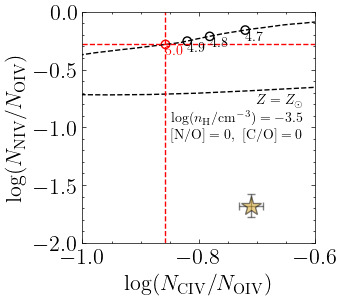

In [14]:
fig, ax = plt.subplots(1, figsize=(3,3))

k = ('isochoric','fg20',1,0,-3.5,3e6)
ax.plot(np.log10(X_dict_TDP_carb[k]['CIV']/X_dict_TDP_oxy[k]['OIV']), 
             np.log10(X_dict_TDP_nit[k]['NIV']/X_dict_TDP_oxy[k]['OIV']), color='black', linestyle='--',
             label=r'$\log (n_\mathrm{H}/\mathrm{cm}^{-3}) = -3.5$')

for logT in np.arange(4.7,5.1,.1):
    
    idx = np.argmin(np.abs(10**logT-T_grid_TDP[k]))
    
    x = np.log10(X_dict_TDP_carb[k]['CIV']/X_dict_TDP_oxy[k]['OIV'])[idx]
    y = np.log10(X_dict_TDP_nit[k]['NIV']/X_dict_TDP_oxy[k]['OIV'])[idx]
    s = str(np.round(np.log10(T_grid_TDP[k][idx]),1))
    
    if -1<x<-0.6 and -2<y<0:
        if s=='5.0':
            c='red'
            ax.axhline(y, linestyle='--', color='red')
            ax.axvline(x, linestyle='--', color='red')

        else:
            c='black'
        ax.scatter(x, y, color=c, facecolor='none')
        ax.text(x,y,s, fontsize=10, horizontalalignment='left', verticalalignment='top', color=c)

ax.errorbar(-0.71, -1.68, xerr=0.02,yerr=0.1,
                 marker='*', markersize=15, markerfacecolor='goldenrod', capsize=3, alpha=.5)

ax.text(-0.62,-0.8, r'$Z=Z_\odot$', fontsize=10,horizontalalignment='right')
ax.text(-0.62,-0.95, r'$\log (n_\mathrm{H}/\mathrm{cm}^{-3}) = -3.5$', fontsize=10, horizontalalignment='right')
ax.text(-0.62,-1.1, r'$\mathrm{[N/O]}=0, \ \mathrm{[C/O]}=0$', fontsize=10,horizontalalignment='right')

ax.set_xlim(-1,-0.6)
ax.set_ylim(-2,0)

#ax.set_ylim(-0.69,-0.31)
ax.set_xlabel(r'$\log(N_\mathrm{CIV}/N_\mathrm{OIV})$')
ax.set_ylabel(r'$\log(N_\mathrm{NIV}/N_\mathrm{OIV})$')

#plt.savefig(rootdir+'Figures/z_109_diagnostic_CN.pdf',dpi=300)
#plt.savefig(rootdir+'Figures/z_109_diagnostic_CN.png',dpi=300)

#ax.legend(fontsize=8)

## OIII, CIII, OV, NV

Text(0, 0.5, '$\\log(N_\\mathrm{NV}/N_\\mathrm{OV})$')

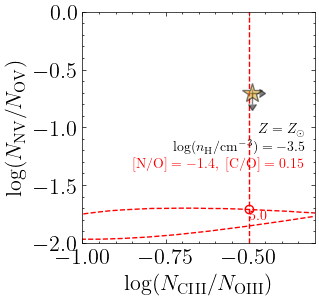

In [15]:
fig, ax = plt.subplots(1, figsize=(3,3))

k = ('isochoric','fg20',1,0,-3.5,3e6)
ax.plot(np.log10(X_dict_TDP_carb[k]['CIII']/X_dict_TDP_oxy[k]['OIII'])+0.15, 
             np.log10(X_dict_TDP_nit[k]['NV']/X_dict_TDP_oxy[k]['OV'])-1.4, color='red', linestyle='--',
             label=r'$\log (n_\mathrm{H}/\mathrm{cm}^{-3}) = -3.5$')

for logT in np.arange(4.7,5.1,.1):
    
    idx = np.argmin(np.abs(10**logT-T_grid_TDP[k]))
    
    x = np.log10(X_dict_TDP_carb[k]['CIII']/X_dict_TDP_oxy[k]['OIII'])[idx]+0.15
    y = np.log10(X_dict_TDP_nit[k]['NV']/X_dict_TDP_oxy[k]['OV'])[idx]-1.4
    s = str(np.round(np.log10(T_grid_TDP[k][idx]),1))
    
    if -1<x<-0.3 and -2<y<0:
        if s=='5.0':
            c='red'
            #ax.axhline(y, linestyle='--', color='red')
            ax.axvline(x, linestyle='--', color='red')

        else:
            c='black'
        ax.scatter(x, y, color=c, facecolor='none')
        ax.text(x,y,s, fontsize=10, horizontalalignment='left', verticalalignment='top', color=c)

ax.errorbar(-0.49, -0.7, xerr=0.02,yerr=0.1, xlolims=True, uplims=True,
                 marker='*', markersize=15, markerfacecolor='goldenrod', capsize=3, alpha=.5)

ax.text(-0.33,-1.05, r'$Z=Z_\odot$', fontsize=10,horizontalalignment='right')
ax.text(-0.33,-1.2, r'$\log (n_\mathrm{H}/\mathrm{cm}^{-3}) = -3.5$', fontsize=10, horizontalalignment='right')
ax.text(-0.33,-1.35, r'$\mathrm{[N/O]}=-1.4, \ \mathrm{[C/O]=0.15}$', fontsize=10, horizontalalignment='right', color='red')

ax.set_xlim(-1,-0.3)
ax.set_ylim(-2,0)

#ax.set_ylim(-0.69,-0.31)
ax.set_xlabel(r'$\log(N_\mathrm{CIII}/N_\mathrm{OIII})$')
ax.set_ylabel(r'$\log(N_\mathrm{NV}/N_\mathrm{OV})$')

#plt.savefig(rootdir+'Figures/z_109_diagnostic2_CN.pdf',dpi=300)
#plt.savefig(rootdir+'Figures/z_109_diagnostic2_CN.png',dpi=300)

#ax.legend(fontsize=8)

# Fit column densities - include carbon + nitrogen

In [252]:
def log_prior_2(log_metals, log_hdens, logT, logN_HI, C_O, N_O):
    
    if log_metals_arr[0]<log_metals<log_metals_arr[-1]:
        if log_hdens_arr[0]<log_hdens<log_hdens_arr[-1]:
            if logT_arr[0]<logT<logT_arr[-1]:
                
                # measured HI - use as upper limit
                logN_HI_obs = 14.4
                
                if 12.0<logN_HI<logN_HI_obs: # Underpredict HI                    
                    if -3<log_metals+C_O<1 and -3<log_metals+N_O<1: # Elemental abundances                    
                        return np.log(10**log_hdens) + np.log(10**logT) + np.log(10**logN_HI)
                    else:
                        return -np.inf
                else:
                    return -np.inf
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [254]:
def log_likelihood_2(log_metals, log_hdens, logT, logN_HI, C_O, N_O, 
                     logN_dict, logX_dict_TDP_interp):

    k = (log_metals,log_hdens,logT) # Access key for model
    
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        # Measurement
        y = float(logN_dict[ion].split(',')[0])
        dy = max(-float(logN_dict[ion].split(',')[1]), float(logN_dict[ion].split(',')[2]))
        
        # Model
        elem = ion_species_dict[ion].split('+')[0]
        
        if elem == 'C':
            yb = logN_HI-logX_dict_TDP_interp['HI'](k)+log_metals+np.log10(solar_rel_dens_dict['Carbon'])+logX_dict_TDP_interp[ion](k)+C_O            
            
        elif elem == 'N':
            yb = logN_HI-logX_dict_TDP_interp['HI'](k)+log_metals+np.log10(solar_rel_dens_dict['Nitrogen'])+logX_dict_TDP_interp[ion](k)+N_O            
            
        elif elem == 'O':
            yb = logN_HI-logX_dict_TDP_interp['HI'](k)+log_metals+np.log10(solar_rel_dens_dict['Oxygen'])+logX_dict_TDP_interp[ion](k)
            
        ll += -0.5*((y-yb)**2/dy**2)

    return ll

In [255]:
def log_probability_2(params, logN_dict, logX_dict_TDP_interp):
    
    log_metals, log_hdens, logT, logN_HI, C_O, N_O = params
    
    lp = log_prior_2(log_metals,log_hdens,logT,logN_HI,C_O,N_O)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood_2(log_metals,log_hdens,logT,logN_HI,C_O,N_O,logN_dict,logX_dict_TDP_interp)

In [257]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    #'CII':'<13.5',
    #'CIII':'>13.8',
    'CIV':'13.96, -0.01, +0.01',
    #'NII':'<13.5',
    'NIV':'13.0, -0.1, +0.1',
    #'NV':'<13.5',
    #'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.05, +0.05',}
    #'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [258]:
pos = np.array([0.0, -3.5, 5.0, 13.5, 0.4, -1.4]) + 1e-4 * np.random.randn(200, 6)
nwalkers, ndim = pos.shape

In [260]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_2, args=(logN_dict, logX_dict_TDP_interp)
)

In [261]:
sampler.run_mcmc(pos, 500, progress=True);

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:33<00:00,  3.26it/s]


In [262]:
flat_samples_2 = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
                                columns=['log_metals', 'log_hdens', 'logT', 'logN_HI', 'C_O', 'N_O'])
flat_samples_2.to_csv(savedir+'TDP_2.csv', index=False)

#flat_samples_2 = pd.read_csv(savedir+'TDP_2.csv')

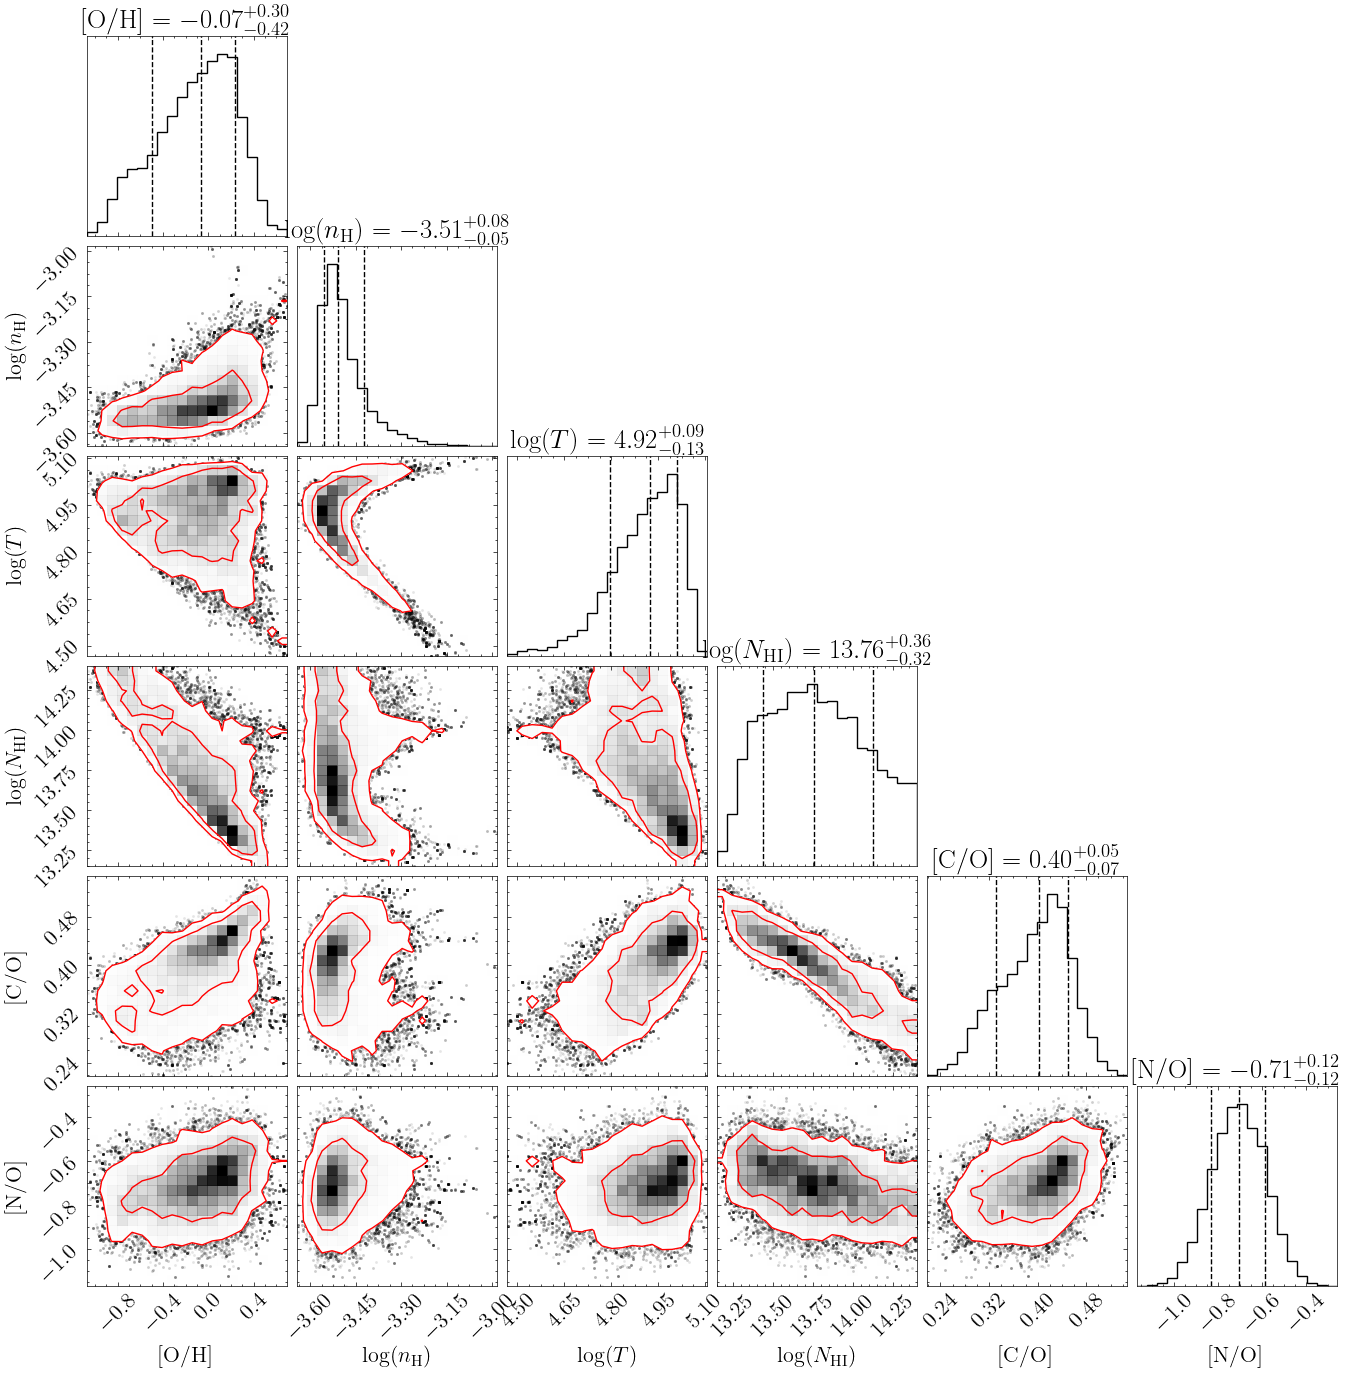

In [263]:
fig = corner.corner(
    flat_samples_2, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}$', r'$\log(n_\mathrm{H})$', r'$\log(T)$', r'$\log(N_\mathrm{HI})$', r'$\mathrm{[C/O]}$', r'$\mathrm{[N/O]}$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

Make a plot

In [264]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    'CII':'<13.5',
    'CIII':'>13.8',
    'CIV':'13.96, -0.01, +0.01',
    'NII':'<13.5',
    'NIV':'13.0, -0.1, +0.1',
    'NV':'<13.5',
    'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.05, +0.05',
    'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [265]:
p2_grid = np.array(flat_samples_2)
k = (p2_grid[:,0], p2_grid[:,1], p2_grid[:,2])

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    
    if ion in list(logN_dict.keys()):
        elem = ion_species_dict[ion].split('+')[0]

        if elem == 'C':
            y_samples = p2_grid[:,3]-logX_dict_TDP_interp['HI'](k)+p2_grid[:,0]+np.log10(solar_rel_dens_dict['Carbon'])+logX_dict_TDP_interp[ion](k)+p2_grid[:,4]

        elif elem == 'N':
            y_samples = p2_grid[:,3]-logX_dict_TDP_interp['HI'](k)+p2_grid[:,0]+np.log10(solar_rel_dens_dict['Nitrogen'])+logX_dict_TDP_interp[ion](k)+p2_grid[:,5]

        elif elem == 'O':
            y_samples = p2_grid[:,3]-logX_dict_TDP_interp['HI'](k)+p2_grid[:,0]+np.log10(solar_rel_dens_dict['Oxygen'])+logX_dict_TDP_interp[ion](k)

        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

(12.8, 15.1)

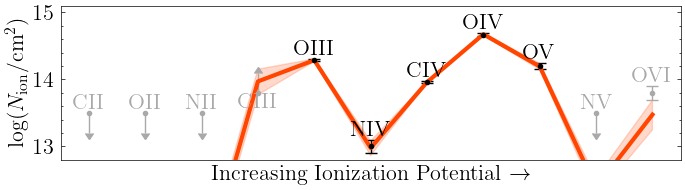

In [266]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax,
                          gray_out = ['OII', 'OVI', 'CII', 'CIII',  'NII', 'NV'])

ax.plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
ax.fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='orangered', alpha=.2)

ax.set_ylim(12.8,15.1)

Cloud size posterior

In [270]:
k = (p2_grid[:,0], p2_grid[:,1], p2_grid[:,2])
logl = p2_grid[:,3]-p2_grid[:,1]-logX_dict_TDP_interp['HI'](k)+np.log10(3.24078e-19*1e-3)

Text(0, 0.5, 'PDF')

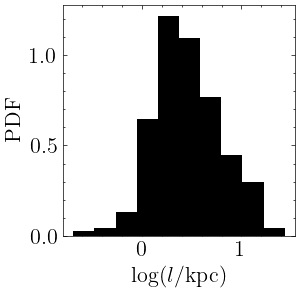

In [276]:
fig, ax = plt.subplots(1, figsize=(3,3))

ax.hist(logl, density=True)

ax.set_xlabel(r'$\log(l / \mathrm{kpc})$')
ax.set_ylabel(r'PDF')

Text(0, 0.5, 'PDF')

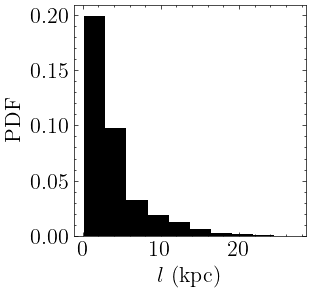

In [274]:
fig, ax = plt.subplots(1, figsize=(3,3))

ax.hist(10**logl, density=True)

ax.set_xlabel(r'$l \ (\mathrm{kpc})$')
ax.set_ylabel(r'PDF')

# Column density ratios for two-phase: OIV, OV, OVI

In [16]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    #'CII':'<13.5',
    #'CIII':'>13.8',
    #'CIV':'13.96, -0.01, +0.01',
    #'NII':'<13.5',
    #'NIV':'13.0, -0.1, +0.1',
    #'NV':'<13.5',
    #'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.05, +0.05',
    'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [280]:
logN_ratio_dict = {'OIV/OIII': '0.38, -0.03, 0.03',
                   'OV/OIV': '-0.47, -0.05, 0.05',
                   'OVI/OV': '-0.40, -0.11, 0.11'
                  }

Text(0.5, 1.0, '$\\mathrm{[O/H]}=-1.0$')

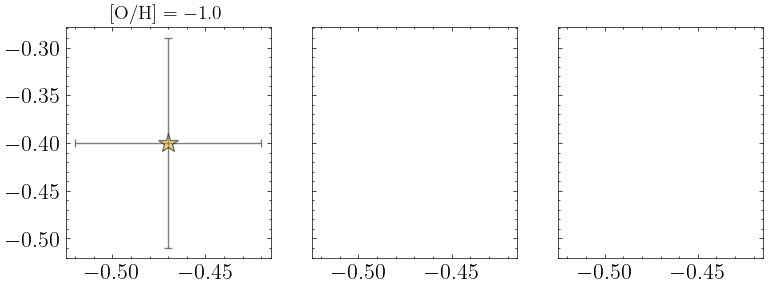

In [281]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OV/OIV', 'OVI/OV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=-1.0$', fontsize=14)


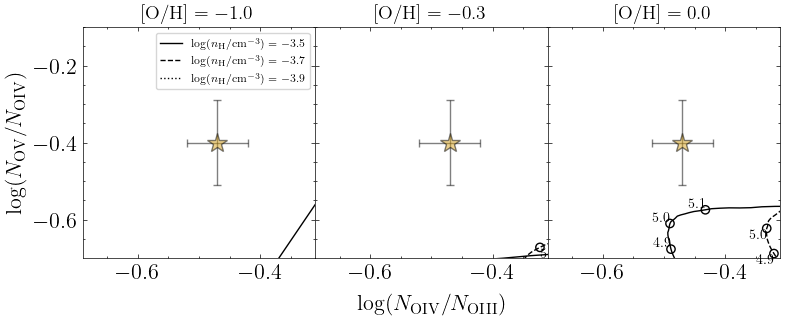

In [295]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OV/OIV', 'OVI/OV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=-1.0$', fontsize=14)

scat_logN_ratio(axes[1], 'OV/OIV', 'OVI/OV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[O/H]}=-0.3$', fontsize=14)

scat_logN_ratio(axes[2], 'OV/OIV', 'OVI/OV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[O/H]}=0.0$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{OV}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -1.0

plot_logN_ratio_track(axes[0], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      -1.0, -3.5, 
                      4.4, 5.3, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      -1.0, -3.7, 
                      4.6, 5.3, .01,
                      4.7, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      -1.0, -3.9, 
                      4.4, 5.5, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      -0.3, -3.5, 
                      4.4, 5.3, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      -0.3, -3.7, 
                      4.6, 5.3, .01,
                      4.7, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      -0.3, -3.9, 
                      4.4, 5.5, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.0, -3.5, 
                      4.4, 5.3, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.0, -3.7, 
                      4.6, 5.3, .01,
                      4.7, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.0, -3.9, 
                      4.4, 5.5, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      ':', 'left', 'top')

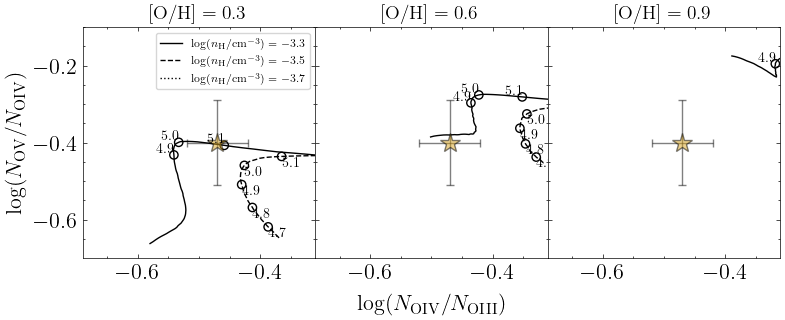

In [283]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OV/OIV', 'OVI/OV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=0.3$', fontsize=14)

scat_logN_ratio(axes[1], 'OV/OIV', 'OVI/OV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[O/H]}=0.6$', fontsize=14)

scat_logN_ratio(axes[2], 'OV/OIV', 'OVI/OV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[O/H]}=0.9$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{OV}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -1.0

plot_logN_ratio_track(axes[0], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.3, -3.3, 
                      4.4, 5.3, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.3, -3.5, 
                      4.6, 5.3, .01,
                      4.7, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.3, -3.7, 
                      4.4, 5.5, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.6, -3.3, 
                      4.4, 5.3, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.6, -3.5, 
                      4.6, 5.3, .01,
                      4.7, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.6, -3.7, 
                      4.4, 5.5, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.9, -3.3, 
                      4.4, 5.3, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.9, -3.5, 
                      4.6, 5.3, .01,
                      4.7, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'OIV', 'OV', 'OV', 'OVI', logX_dict_TDP_interp,
                      0.9, -3.7, 
                      4.4, 5.5, .01,
                      4.9, 5.3, .1,
                       -.69, -.31, -.7, -.1,
                      ':', 'left', 'top')

# Fit column densities - oxygen including OVI

In [296]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    #'CII':'<13.5',
    #'CIII':'>13.8',
    #'CIV':'13.96, -0.01, +0.01',
    #'NII':'<13.5',
    #'NIV':'13.0, -0.1, +0.1',
    #'NV':'<13.5',
    #'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.05, +0.05',
    'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [297]:
pos = np.array([0.3, -3.5, 5.0, 13.5]) + 1e-4 * np.random.randn(200, 4)
nwalkers, ndim = pos.shape

In [298]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_1, args=(logN_dict,logX_dict_TDP_interp)
)

In [299]:
sampler.run_mcmc(pos, 500, progress=True);

100%|█████████████████████████████████████████████████████| 500/500 [02:10<00:00,  3.83it/s]


In [300]:
flat_samples_3 = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
                                columns=['log_metals', 'log_hdens', 'logT', 'logN_HI'])
flat_samples_3.to_csv(savedir+'TDP_3.csv', index=False)

#flat_samples_3 = pd.read_csv(savedir+'TDP_3.csv')

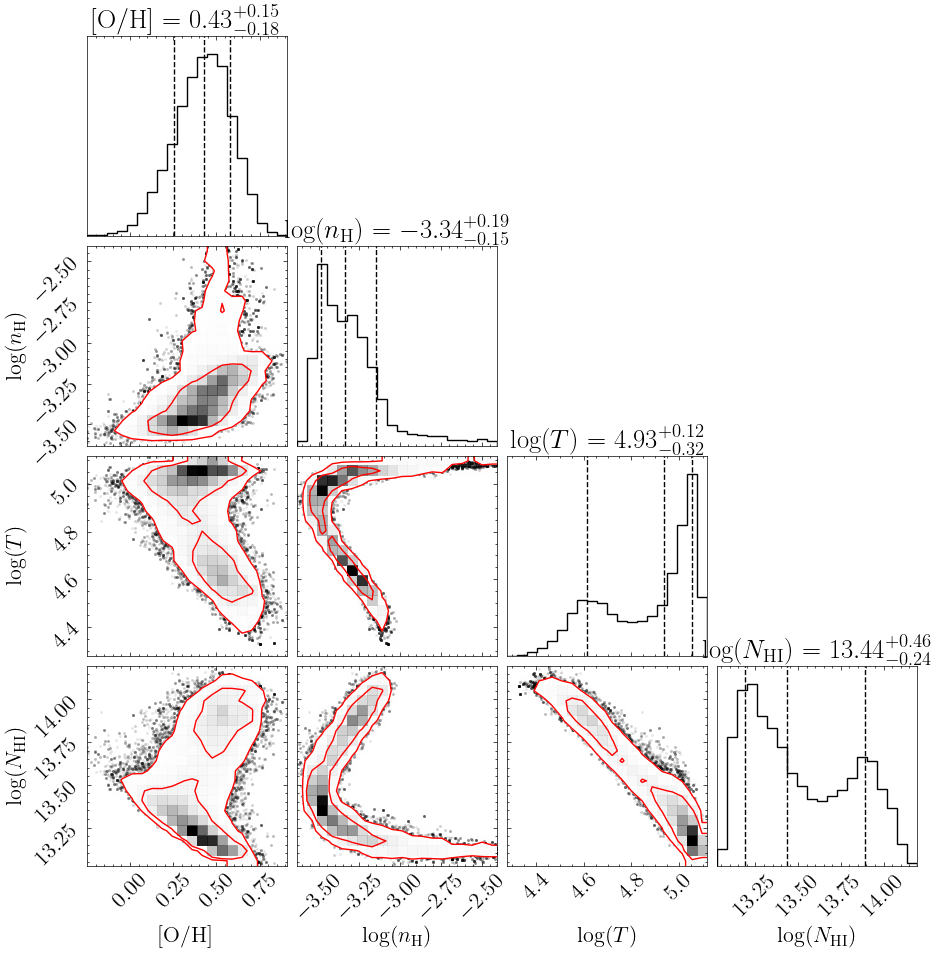

In [301]:
fig = corner.corner(
    flat_samples_3, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}$', r'$\log(n_\mathrm{H})$', r'$\log(T)$', r'$\log(N_\mathrm{HI})$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

Make a plot

In [302]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    'CII':'<13.5',
    'CIII':'>13.8',
    'CIV':'13.96, -0.01, +0.01',
    'NII':'<13.5',
    'NIV':'13.0, -0.1, +0.1',
    'NV':'<13.5',
    'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.05, +0.05',
    'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [303]:
p3_grid = np.array(flat_samples_3)
k = (p3_grid[:,0], p3_grid[:,1], p3_grid[:,2])

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    
    if ion in list(logN_dict.keys()):
        elem = ion_species_dict[ion].split('+')[0]

        if elem == 'C':
            y_samples = p3_grid[:,3]-logX_dict_TDP_interp['HI'](k)+p3_grid[:,0]+np.log10(solar_rel_dens_dict['Carbon'])+logX_dict_TDP_interp[ion](k)

        elif elem == 'N':
            y_samples = p3_grid[:,3]-logX_dict_TDP_interp['HI'](k)+p3_grid[:,0]+np.log10(solar_rel_dens_dict['Nitrogen'])+logX_dict_TDP_interp[ion](k)

        elif elem == 'O':
            y_samples = p3_grid[:,3]-logX_dict_TDP_interp['HI'](k)+p3_grid[:,0]+np.log10(solar_rel_dens_dict['Oxygen'])+logX_dict_TDP_interp[ion](k)

        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1
        
        #print(idx, ion, yb_med[idx])

(12.8, 15.1)

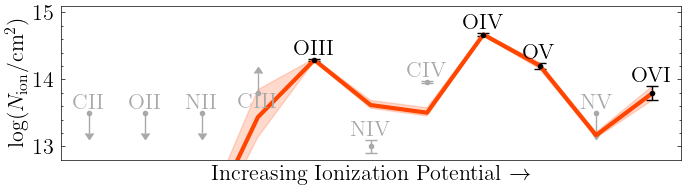

In [304]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax,
                          gray_out = ['OII', 'CII', 'CIII', 'CIV', 'NII', 'NIV', 'NV'])

ax.plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
ax.fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='orangered', alpha=.2)

ax.set_ylim(12.8,15.1)

## Plots

In [109]:
yb_med_p2[-10], yb_med_p2[-10]-yb_lo_p2[-10], yb_hi_p2[-10]-yb_med_p2[-10]

(14.212629038983385, 0.05854990102494817, 0.042228004202453207)

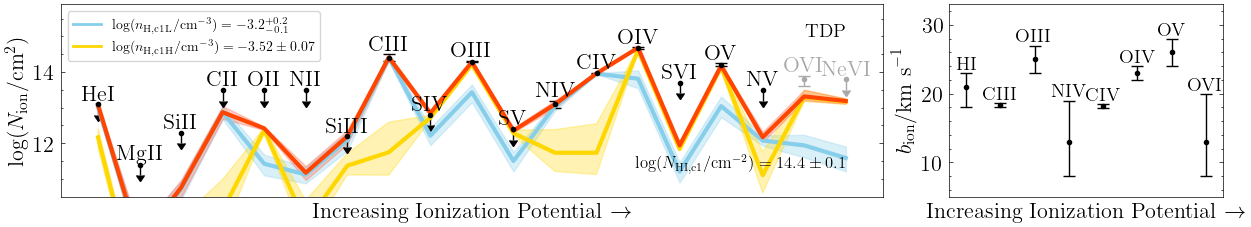

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(15,2.5), gridspec_kw={'width_ratios': [3, 1]})

plot_column_densities_obs(logN_dict, fig, axes[0],
                          gray_out = ['OVI', 'NeVI'])

axes[0].plot(np.arange(len(logN_dict)), yb_med_p1, lw=3, color='skyblue')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p1, yb_hi_p1, color='skyblue', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med_p2, lw=3, color='gold')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p2, yb_hi_p2, color='gold', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

axes[0].set_ylim(10.5,15.9)

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c1L}/\mathrm{cm}^{-3}) = -3.2_{-0.1}^{+0.2}$'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c1H}/\mathrm{cm}^{-3}) = -3.52 \pm 0.07$'))
    
axes[0].text(len(logN_dict)-1, 15.0, r'TDP',fontsize=14, horizontalalignment='right')
axes[0].text(len(logN_dict)-1, 11.3, r'$\log(N_\mathrm{HI, c1}/\mathrm{cm}^{-2}) = 14.4 \pm 0.1$', fontsize=12,
            horizontalalignment='right')

axes[0].legend(handles=handles, loc='upper left', fontsize=10)

plot_linewidth_obs(b_dict, fig, axes[1], fs=14)
axes[1].set_xlim(-0.5, len(b_dict)-1+0.5)
axes[1].set_ylim(5,33)

plt.subplots_adjust(wspace=0.12, hspace=0)  

#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

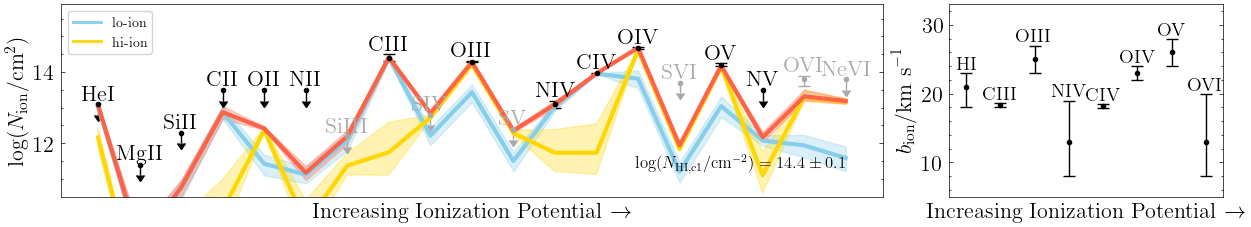

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(15,2.5), gridspec_kw={'width_ratios': [3, 1]})

plot_column_densities_obs(logN_dict, fig, axes[0],
                          gray_out = ['OVI', 'SiIII', 'SIV', 'SV', 'SVI', 'NeVI'])

axes[0].plot(np.arange(len(logN_dict)), yb_med_p1, lw=3, color='skyblue')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p1, yb_hi_p1, color='skyblue', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med_p2, lw=3, color='gold')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p2, yb_hi_p2, color='gold', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='tomato')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

axes[0].set_ylim(10.5,15.9)

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, label=r'lo-ion'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'hi-ion'))
    
#axes[0].text(len(logN_dict)-1, 15.0, r'TDP',fontsize=14, horizontalalignment='right')
axes[0].text(len(logN_dict)-1, 11.3, r'$\log(N_\mathrm{HI, c1}/\mathrm{cm}^{-2}) = 14.4 \pm 0.1$', fontsize=12,
            horizontalalignment='right')

axes[0].legend(handles=handles, loc='upper left', fontsize=10)

plot_linewidth_obs(b_dict, fig, axes[1], fs=14)
axes[1].set_xlim(-0.5, len(b_dict)-1+0.5)
axes[1].set_ylim(5,33)

plt.subplots_adjust(wspace=0.12, hspace=0)  

plt.savefig(savedir+'TDP_full.pdf', dpi=300)
plt.savefig(savedir+'TDP_full.png', dpi=300)

# Fit column density ratios

## Probability functions

In [15]:
def log_prior_ratio(log_metals, log_hdens, logT, logX_dict_TDP_interp):
    
    if log_metals_arr[0]<log_metals<log_metals_arr[-1]:
        if log_hdens_arr[0]<log_hdens<log_hdens_arr[-1]:
            if logT_arr[0]<logT<logT_arr[-1]:
                
                # HI - use as upper limit
                logN_HI_obs = 14.4
                logN_OIII_obs = 14.29
                
                k = (log_metals,log_hdens,logT) # Access key

                # Model predictions                
                logN_HI = logN_OIII_obs-log_metals-np.log10(solar_rel_dens_dict['O'])-logX_dict_TDP_interp['OIII'](k)+logX_dict_TDP_interp['HI'](k)
                
                if 12.0<logN_HI<logN_HI_obs: # Underpredict HI
                    return np.log(10**log_hdens) + np.log(10**logT)
                else:
                    return -np.inf
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [16]:
def log_likelihood_ratio(log_metals, log_hdens, logT, logN_ratio_dict, logX_dict_TDP_interp):
    
    
    k = (log_metals,log_hdens,logT) # Access key for model predictions
    
    ll = 0
    
    for ion_pair in list(logN_ratio_dict.keys()):
        ion2, ion1 = ion_pair.split('/')[0], ion_pair.split('/')[1]
        yb = logX_dict_TDP_interp[ion2](k)-logX_dict_TDP_interp[ion1](k) # Model prediction
        y = float(logN_ratio_dict[ion_pair].split(',')[0]) # Measurement
        dy = max(-float(logN_ratio_dict[ion_pair].split(',')[1]), float(logN_ratio_dict[ion_pair].split(',')[2]))
        ll += -0.5*((y-yb)**2/dy**2)    # Compute chi-square
 
    return ll

In [17]:
def log_probability_ratio(params, logN_ratio_dict, logX_dict_TDP_interp):
    
    log_metals, log_hdens, logT = params
    
    lp = log_prior_ratio(log_metals, log_hdens, logT, logX_dict_TDP_interp)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_ratio(log_metals, log_hdens, logT, logN_ratio_dict, logX_dict_TDP_interp)

## Optimization

In [18]:
logN_ratio_dict = {'OIV/OIII': '0.38, -0.03, 0.03',
                   'OV/OIV': '-0.47, -0.05, 0.05'
                  }

In [19]:
pos = np.array([0.0, -3.5, 5.0]) + 1e-4 * np.random.randn(200, 3)
nwalkers, ndim = pos.shape

In [20]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_ratio, args=(logN_ratio_dict, logX_dict_TDP_interp)
)

In [21]:
#sampler.run_mcmc(pos, 500, progress=True);

In [22]:
#flat_samples_0 = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals', 'log_hdens', 'logT'])
#flat_samples_0.to_csv(savedir+'TDP_0.csv', index=False)

flat_samples_0 = pd.read_csv(savedir+'TDP_0.csv')

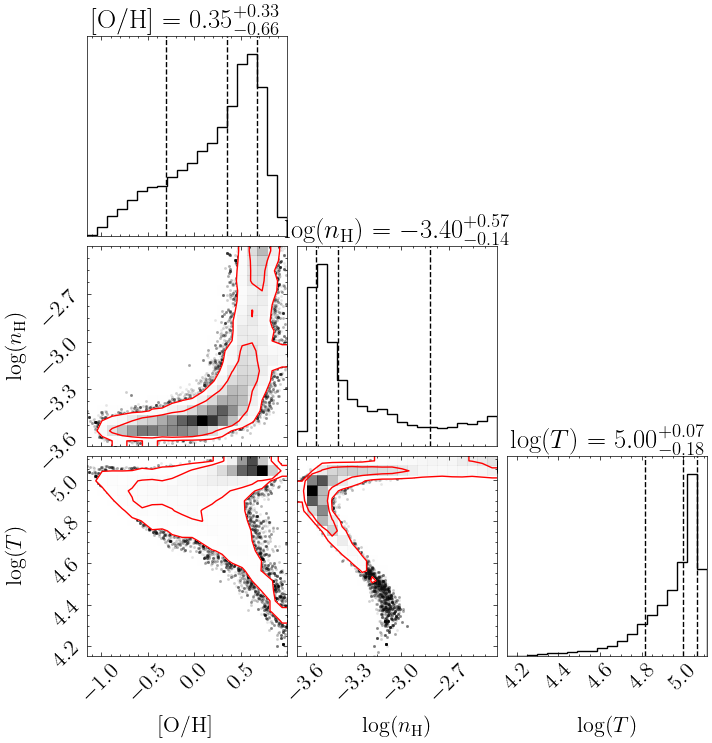

In [23]:
fig = corner.corner(
    flat_samples_0, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}$', r'$\log(n_\mathrm{H})$', r'$\log(T)$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

## Contours in ion ratio

In [24]:
p_grid = np.array(flat_samples_0)
k = (p_grid[:,0], p_grid[:,1], p_grid[:,2])
x_samples = logX_dict_TDP_interp['OIV'](k)-logX_dict_TDP_interp['OIII'](k)  
y_samples = logX_dict_TDP_interp['OV'](k)-logX_dict_TDP_interp['OIV'](k)    

Text(0, 0.5, '$\\log(N_\\mathrm{OV}/N_\\mathrm{OIV})$')

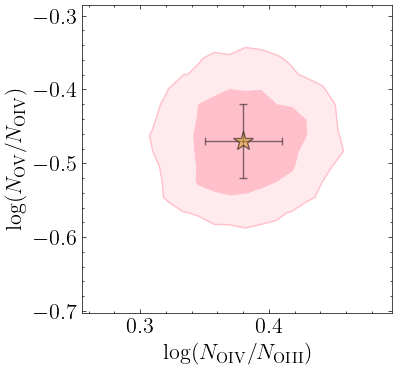

In [25]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.errorbar(0.38, -0.47, xerr=0.03,yerr=0.05,
                 marker='*', markersize=15, markerfacecolor='goldenrod', capsize=3, alpha=.5)

corner.hist2d(x_samples, y_samples, levels=[0.68, 0.95], plot_datapoints=False,
             fill_contours=True, color='pink')

ax.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$')
ax.set_ylabel(r'$\log(N_\mathrm{OV}/N_\mathrm{OIV})$')

## Check OII/OIII

In [26]:
z1_samples = logX_dict_TDP_interp['OII'](k)-logX_dict_TDP_interp['OIII'](k)  

Text(0, 0.5, 'PDF')

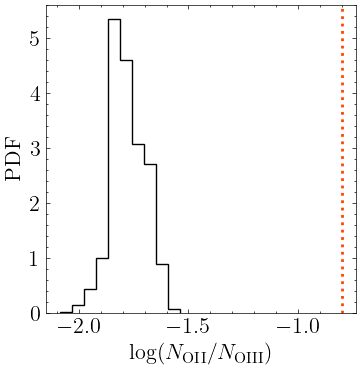

In [27]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(z1_samples, histtype='step', density=True)
ax.axvline(-0.8, linestyle=':', color='orangered', lw=2)
ax.set_xlabel(r'$\log(N_\mathrm{OII}/N_\mathrm{OIII})$')
ax.set_ylabel(r'PDF')

## Check HI

In [28]:
z2_samples = 14.29-p_grid[:,0]-np.log10(solar_rel_dens_dict['O'])-logX_dict_TDP_interp['OIII'](k)+logX_dict_TDP_interp['HI'](k)

Text(0, 0.5, 'PDF')

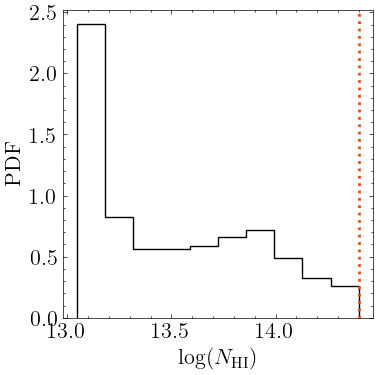

In [29]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(z2_samples, histtype='step', density=True)
ax.axvline(14.4, linestyle=':', color='orangered', lw=2)
ax.set_xlabel(r'$\log(N_\mathrm{HI})$')
ax.set_ylabel(r'PDF')

# Fit column densities - oxygen only

In [30]:
def log_prior_1(log_metals, log_hdens, logT, logN_HI):
    
    if log_metals_arr[0]<log_metals<log_metals_arr[-1]:
        if log_hdens_arr[0]<log_hdens<log_hdens_arr[-1]:
            if logT_arr[0]<logT<logT_arr[-1]:
                
                # measured HI - use as upper limit
                logN_HI_obs = 14.4
                
                if 12.0<logN_HI<logN_HI_obs: # Underpredict HI
                    return np.log(10**log_hdens) + np.log(10**logT) + np.log(10**logN_HI)
                else:
                    return -np.inf
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [31]:
def log_likelihood_1(log_metals, log_hdens, logT, logN_HI, logN_dict, logX_dict_TDP_interp):
        
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        y_bar = predict_col_dens_TDP(ion, log_metals, log_hdens, logT, logN_HI, logX_dict_TDP_interp)
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    # Compute chi-square
    return ll

In [32]:
def log_probability_1(params, logN_dict, logX_dict_TDP_interp):
    
    log_metals, log_hdens, logT, logN_HI = params
    
    lp = log_prior_1(log_metals,log_hdens,logT,logN_HI)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood_1(log_metals,log_hdens,logT,logN_HI,logN_dict,logX_dict_TDP_interp)

In [33]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    #'CII':'<13.5',
    #'CIII':'>13.8',
    #'CIV':'13.96, -0.01, +0.01',
    #'NII':'<13.5',
    #'NIV':'13.0, -0.1, +0.1',
    #'NV':'<13.5',
    'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.05, +0.05',}
    #'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [34]:
log_metals_test = 0.0
log_hdens_test = -3.5
logT_test = 5.0
logN_HI_test = 13.5

logN_test = predict_col_dens_model_TDP(logN_dict,log_metals_test,log_hdens_test,logT_test,logN_HI_test,logX_dict_TDP_interp)

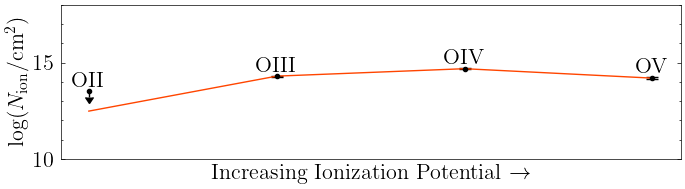

In [35]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax,
                          gray_out = ['CII', 'CIII', 'CIV'])

ax.plot(np.arange(len(logN_dict)), logN_test, color='orangered')

In [36]:
pos = np.array([log_metals_test, log_hdens_test, logT_test, logN_HI_test]) + 1e-4 * np.random.randn(200, 4)
nwalkers, ndim = pos.shape

In [37]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_1, args=(logN_dict,logX_dict_TDP_interp)
)

In [38]:
#sampler.run_mcmc(pos, 500, progress=True);

In [39]:
#flat_samples_1 = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals', 'log_hdens', 'logT', 'logN_HI'])
#flat_samples_1.to_csv(savedir+'TDP_1.csv', index=False)

flat_samples_1 = pd.read_csv(savedir+'TDP_1.csv')

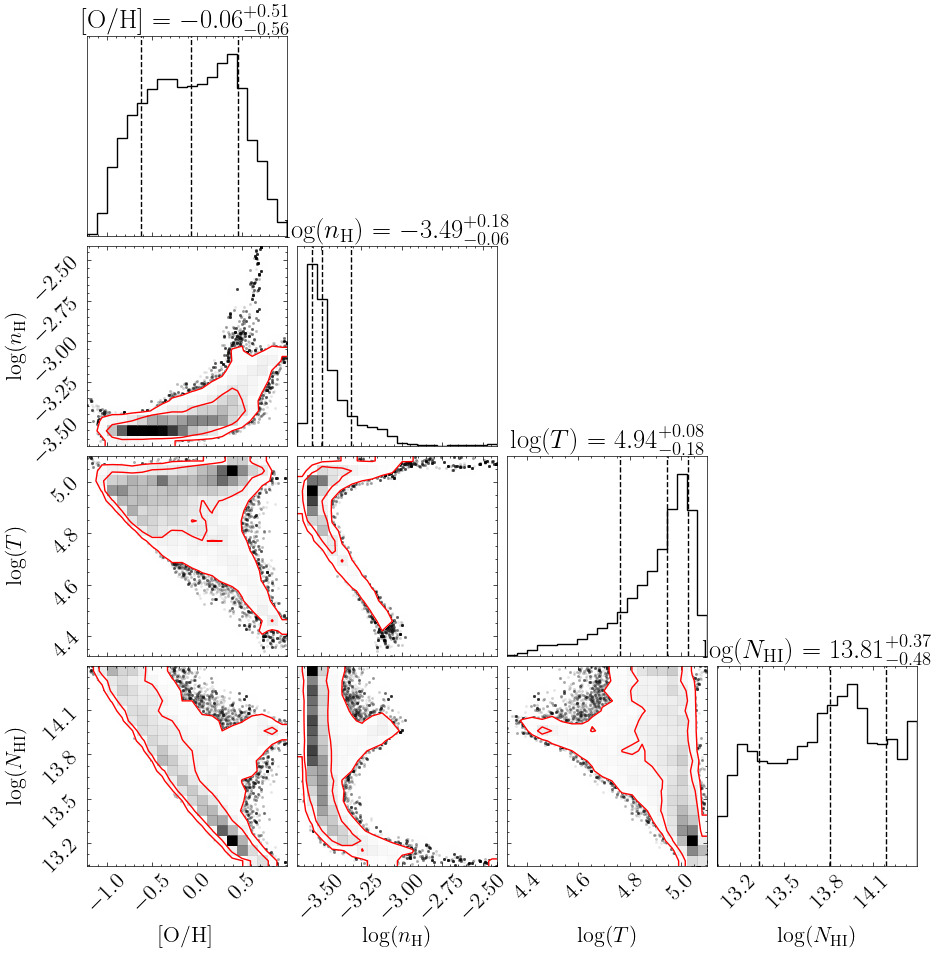

In [40]:
fig = corner.corner(
    flat_samples_1, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}$', r'$\log(n_\mathrm{H})$', r'$\log(T)$', r'$\log(N_\mathrm{HI})$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

Make a plot

In [41]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    'CII':'<13.5',
    'CIII':'>13.8',
    'CIV':'13.96, -0.01, +0.01',
    'NII':'<13.5',
    'NIV':'13.0, -0.1, +0.1',
    'NV':'<13.5',
    'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.05, +0.05',
    'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [42]:
b_dict = {'HI':'22, -2, +2',
          'CIII':'22, -3, +4',
          'CIV':'18.2, -0.3, +0.3',
          'NIV':'13, -5, +6',
          'OIII':'25, -2, +2',
          'OIV':'23, -1, +1',
          'OV':'26, -2, +2',
          'OVI':'13, -5, +7'}

In [43]:
p1_grid = np.array(flat_samples_1)

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]

    if ion in list(logN_dict.keys()):
        
        y_samples = predict_col_dens_TDP(ion, p1_grid[:,0], p1_grid[:,1], p1_grid[:,2], p1_grid[:,3], logX_dict_TDP_interp)

        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

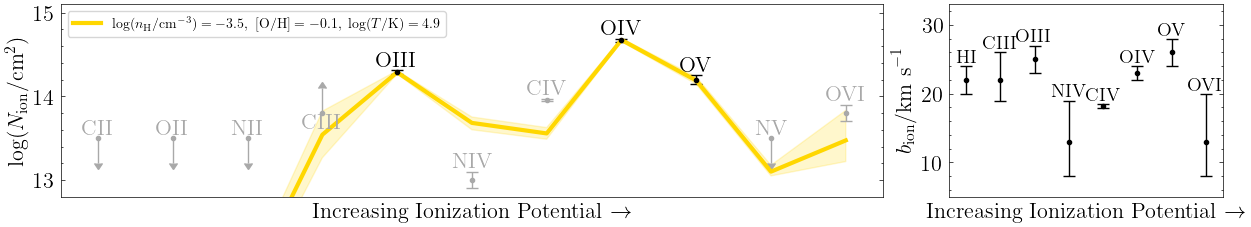

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15,2.5), gridspec_kw={'width_ratios': [3, 1]})

plot_column_densities_obs(logN_dict, fig, axes[0],
                          gray_out = ['OII', 'OVI', 'CII', 'CIII', 'CIV', 'NII', 'NIV', 'NV'])

axes[0].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='gold', 
             label=r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3}) = -3.5, \ \mathrm{[O/H]} = -0.1, \ \log(T/\mathrm{K}) = 4.9$')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='gold', alpha=.2)

axes[0].set_ylim(12.8,15.1)

axes[0].legend(loc='upper left', fontsize=10)

plt.subplots_adjust(wspace=0.12, hspace=0)  

plot_linewidth_obs(b_dict, fig, axes[1], fs=14)
axes[1].set_xlim(-0.5, len(b_dict)-1+0.5)
axes[1].set_ylim(5,33)

plt.savefig(savedir+'TDP_fit_oxy.pdf', dpi=300)
plt.savefig(savedir+'TDP_fit_oxy.png', dpi=300)

# Fit column densities - hydrogen+carbon

In [45]:
def log_prior_2(log_metals, log_hdens, logT, C_O):
    
    if log_metals_arr[0]<log_metals<log_metals_arr[-1] and -3<log_metals+C_O<1: #[C/H]
        if log_hdens_arr[0]<log_hdens<log_hdens_arr[-1]:
            if 4.0<logT<4.8: # Temperature limits based on HI/CIV linewidth
                return np.log(10**log_hdens) + np.log(10**logT)
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [46]:
def log_likelihood_2(log_metals, log_hdens, logT, C_O, logN_dict, logX_dict_TDP_interp):
    
    logN_HI_obs = 14.4 # Measured N(HI) to generate column densities
    
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        # Model side: prediction adjusted for elemental abundance
        elem = ion_species_dict[ion].split('+')[0]
        
        y_bar = predict_col_dens_TDP(ion, log_metals, log_hdens, logT, logN_HI_obs, logX_dict_TDP_interp)
        if elem == 'C':
            y_bar += C_O 
            
        # Data side: handle upper limits, lower limits, and measurements separately
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    return ll

In [47]:
def log_probability_2(params, logN_dict, logX_dict_TDP_interp):
    
    log_metals, log_hdens, logT, C_O = params
    
    lp = log_prior_2(log_metals,log_hdens,logT,C_O)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood_2(log_metals,log_hdens,logT,C_O,logN_dict,logX_dict_TDP_interp)

In [48]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    'CII':'<13.5',
    'CIII':'>13.8',
    'CIV':'13.96, -0.01, +0.01',
    #'NII':'<13.5',
    #'NIV':'13.0, -0.1, +0.1',
    #'NV':'<13.5',
    'OII':'<13.5',
    'OIII':'<14.29',
    'OIV':'<14.67',
    'OV':'<14.20',}
    #'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [49]:
log_metals_test = -0.4
log_hdens_test = -3.6
logT_test = 4.3
logN_HI_test = 14.4
C_O_test = -0.15

logN_test = predict_col_dens_model_TDP(logN_dict,log_metals_test,log_hdens_test,logT_test,logN_HI_test,logX_dict_TDP_interp)

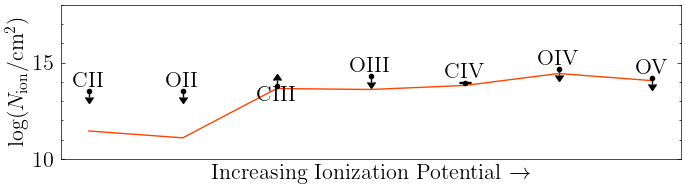

In [50]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax,)

ax.plot(np.arange(len(logN_dict)), logN_test, color='orangered')

In [51]:
pos = np.array([log_metals_test, log_hdens_test, logT_test, C_O_test]) + 1e-4 * np.random.randn(200, 4)
nwalkers, ndim = pos.shape

In [52]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_2, args=(logN_dict,logX_dict_TDP_interp)
)

In [53]:
#sampler.run_mcmc(pos, 500, progress=True);

In [54]:
#flat_samples_2 = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals', 'log_hdens', 'logT', 'C_O'])
#flat_samples_2.to_csv(savedir+'TDP_2.csv', index=False)

flat_samples_2 = pd.read_csv(savedir+'TDP_2.csv')

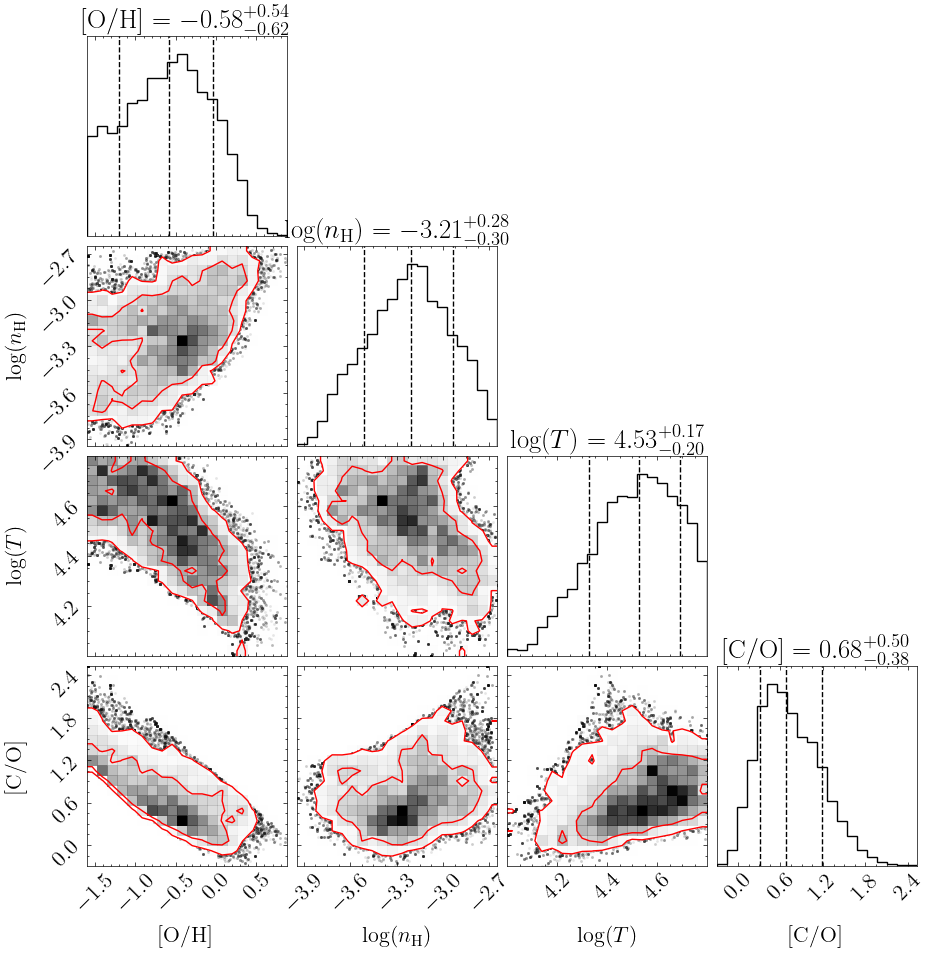

In [55]:
fig = corner.corner(
    flat_samples_2, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}$', r'$\log(n_\mathrm{H})$', r'$\log(T)$', r'$\mathrm{[C/O]}$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

Make a plot

In [56]:
logN_dict = {
    #'HI':'14.4, -0.1, +0.1',
    #'HeI':'<13.1',
    'CII':'<13.5',
    'CIII':'>13.8',
    'CIV':'13.96, -0.01, +0.01',
    'NII':'<13.5',
    'NIV':'13.0, -0.1, +0.1',
    'NV':'<13.5',
    'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.05, +0.05',
    'OVI':'13.8, -0.1, +0.1',}
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',}
    #'SiIII':'<12.2',
    #'SIV':'<12.8',
    #'SV':'<12.4',
    #'SVI':'<13.7',
    #'FeII':'<11.8',}

In [57]:
p2_grid = np.array(flat_samples_2)

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    elem = ion_species_dict[ion].split('+')[0]
    
    if ion in list(logN_dict.keys()):
        
        y_samples = predict_col_dens_TDP(ion, p2_grid[:,0], p2_grid[:,1], p2_grid[:,2], 14.4, logX_dict_TDP_interp)
        if elem == 'C':
            y_samples += p2_grid[:,3]

        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

(12.8, 15.1)

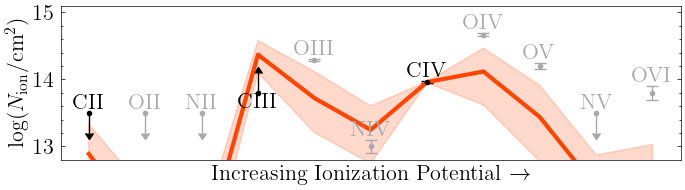

In [58]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax,
                          gray_out = ['OII', 'OIII', 'OIV', 'OV', 'OVI', 'NII', 'NIV', 'NV'])

ax.plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
ax.fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='orangered', alpha=.2)

ax.set_ylim(12.8,15.1)

## HI

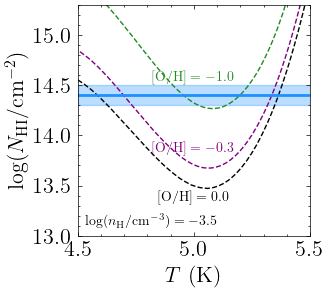

In [14]:
fig, ax = plt.subplots(1, figsize=(3,3))

ax.text(5.0, 13.45, r'$\mathrm{[O/H]}=0.0$', color='black', fontsize=10, horizontalalignment='center', verticalalignment='top')
logT_filt, logN_HI_filt = get_logN_HI('OIII', 14.29, 0, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='black', linestyle='--', label=r'$\mathrm{[O/H]}=0.0$')

ax.text(5.0, 13.8, r'$\mathrm{[O/H]}=-0.3$', color='purple', fontsize=10, 
        horizontalalignment='center', verticalalignment='bottom')
logT_filt, logN_HI_filt = get_logN_HI('OIII', 14.29, -0.3, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='purple', linestyle='--', label=r'$\mathrm{[O/H]}=-0.3$')

ax.text(5.0, 14.5, r'$\mathrm{[O/H]}=-1.0$', color='forestgreen', fontsize=10, 
        horizontalalignment='center', verticalalignment='bottom')
logT_filt, logN_HI_filt = get_logN_HI('OIII', 14.29, -1.0, -3.5, logT_arr, logX_dict_TDP_interp)
ax.plot(logT_filt, logN_HI_filt,color='forestgreen', linestyle='--', label=r'$\mathrm{[O/H]}=-1.0$')

ax.axhline(14.4, color='dodgerblue', lw=2)
ax.axhspan(14.3,14.5, color='dodgerblue',alpha=.3)
#ax.axvline(5.0, color='orangered', lw=2, linestyle='--')

ax.set_xlim(4.5, 5.5)
ax.set_ylim(13, 15.3)

ax.text(5.1, 13.1, r'$\log(n_\mathrm{H}/\mathrm{cm}^{-3}) = -3.5$', fontsize=10, horizontalalignment='right')


#ax.legend(fontsize=10, loc='lower right')
ax.set_xlabel(r'$T \ (\mathrm{K})$')
ax.set_ylabel(r'$\log(N_\mathrm{HI}/\mathrm{cm}^{-2})$')

#plt.savefig(savedir+'diagnostic_HI.pdf', dpi=300)
#plt.savefig(savedir+'diagnostic_HI.png', dpi=300)

# Fit column densities - two-phase TDP

In [9]:
def log_prior(log_metals_p1, log_hdens_p1, logT_p1, C_O_p1, N_O_p1,
                log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2, logX_dict_TDP_interp):
        
    logN_HI_obs = 14.5
    
    if log_metals_arr[0]<log_metals_p1<log_metals_arr[-1] and log_metals_arr[0]<log_metals_p2<log_metals_arr[-1]:
        if -3<log_metals_p1+C_O_p1<1 and C_O_p1 < 1.5 and -3<log_metals_p2+C_O_p2<1 and -3<log_metals_p1+N_O_p1<1 and -3<log_metals_p2+N_O_p2<1:
            if log_hdens_arr[0]<log_hdens_p1<log_hdens_arr[-1] and log_hdens_arr[0]<log_hdens_p2<log_hdens_arr[-1]:
                if 4.0<logT_p1<4.6 and 4.1<logT_p2<5.8: # Temperature limits based on HI/CIV linewidth
                    if 12.0<logN_HI_p2<logN_HI_obs:
                        if log_hdens_p1>log_hdens_p2 and logT_p1<logT_p2: # CIV denser and colder
                            logl_p1 = get_logl_TDP(log_metals_p1, log_hdens_p1, logT_p1, logN_HI_obs, logX_dict_TDP_interp)
                            logl_p2 = get_logl_TDP(log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
                            
                            # Limits for diffuse cloud size
                            logl_p2_S = np.log10(0.03*(10**log_hdens_p2/1e-3)**-1) # in kpc
                            logl_p2_J = np.log10(40*(10**log_hdens_p2/1e-3)**-0.5*(10**logT_p2/1e4)**0.5) # added scaling for temperature        
                    
                            if logl_p1<logl_p2 and logl_p2_S<logl_p2<logl_p2_J:
                                return np.log(10**logN_HI_p2) # log10 to linear, then natural log
                            else:
                                return -np.inf
                        else:
                            return -np.inf
                    else:
                        return -np.inf
                else:
                    return -np.inf
            else:
                return -np.inf
        else:
            return -np.inf
    else:
        return -np.inf

In [10]:
def log_likelihood(log_metals_p1, log_hdens_p1, logT_p1, C_O_p1, N_O_p1,
                     log_metals_p2, log_hdens_p2, logT_p2, C_O_p2, N_O_p2, logN_HI_p2,
                     logN_dict, logX_dict_TDP_interp):
    
    logN_HI_obs = 14.5 # Measured N(HI) to generate column densities
    
    ll = 0
    
    for ion in list(logN_dict.keys()):
        
        # Model side: prediction adjusted for elemental abundance
        elem = ion_species_dict[ion].split('+')[0]
        
        y_bar_p1 = predict_col_dens_TDP(ion, log_metals_p1, log_hdens_p1, logT_p1, logN_HI_obs, logX_dict_TDP_interp)
        y_bar_p2 = predict_col_dens_TDP(ion, log_metals_p2, log_hdens_p2, logT_p2, logN_HI_p2, logX_dict_TDP_interp)
        
        if elem == 'C': 
            y_bar_p1 += C_O_p1
            y_bar_p2 += C_O_p2
            
        if elem == 'N':
            y_bar_p1 += N_O_p1
            y_bar_p2 += N_O_p2
          
        y_bar = np.log10(10**y_bar_p1 + 10**y_bar_p2)
            
        # Data side: handle upper limits, lower limits, and measurements separately
        logN_str = logN_dict[ion]
        
        ll += compute_ll(logN_str, y_bar)

    return ll

In [11]:
def log_probability(params, logN_dict, logX_dict_TDP_interp):
    
    log_metals_p1,log_hdens_p1,logT_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2 = params
    
    lp = log_prior(log_metals_p1,log_hdens_p1,logT_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2,logX_dict_TDP_interp)
    
    if not np.isfinite(lp):
        return -np.inf
    return lp+log_likelihood(log_metals_p1,log_hdens_p1,logT_p1,C_O_p1,N_O_p1,log_metals_p2,log_hdens_p2,logT_p2,C_O_p2,N_O_p2,logN_HI_p2,logN_dict,logX_dict_TDP_interp)

In [12]:
logN_dict = {
    'HI':'14.5, -0.1, +0.2',
    'HeI':'<13.1',
    'CII':'<13.5',
    'CIII':'14.4, -0.1, +0.1',
    'CIV':'13.96, -0.01, +0.01',
    'NII':'<13.5',
    'NIV':'13.1, -0.1, +0.1',
    'NV':'<13.5',
    'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.04, +0.04',
    'OVI':'<13.8',
    'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    'SiII':'<12.3',
    'SiIII':'<12.2',
    'SIV':'<12.8',
    'SV':'<12.4',
    'SVI':'<13.7',}
    #'FeII':'<11.8',}

In [13]:
log_metals_test_p1 = -0.6
log_hdens_test_p1 = -3.1
logT_test_p1 = 4.5
C_O_test_p1 = 0.75
N_O_test_p1 = -0.1
logN_HI_test_p1 = 14.5

logN_test_p1 = predict_col_dens_model_TDP(logN_dict,log_metals_test_p1,log_hdens_test_p1,logT_test_p1,logN_HI_test_p1,logX_dict_TDP_interp,C_O_test_p1,N_O_test_p1)

log_metals_test_p2 = -0.4
log_hdens_test_p2 = -3.5
logT_test_p2 = 4.9
C_O_test_p2 = -2.0
N_O_test_p2 = -2.0
logN_HI_test_p2 = 13.9

logN_test_p2 = predict_col_dens_model_TDP(logN_dict,log_metals_test_p2,log_hdens_test_p2,logT_test_p2,logN_HI_test_p2,logX_dict_TDP_interp,C_O_test_p2,N_O_test_p2)

logN_test = np.log10(10**logN_test_p1 + 10**logN_test_p2)

(12.0, 16.0)

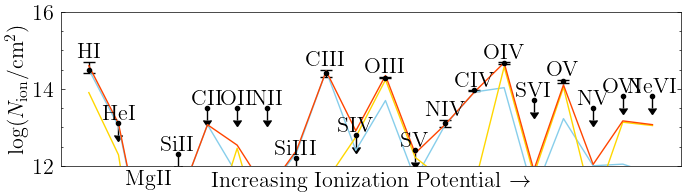

In [14]:
fig, ax = plt.subplots(1, figsize=(8,2))

plot_column_densities_obs(logN_dict, fig, ax)
ax.plot(np.arange(len(logN_dict)), logN_test_p1, color='skyblue')
ax.plot(np.arange(len(logN_dict)), logN_test_p2, color='gold')
ax.plot(np.arange(len(logN_dict)), logN_test, color='orangered')

ax.set_ylim(12,16)

In [15]:
pos = np.array([log_metals_test_p1,log_hdens_test_p1,logT_test_p1,C_O_test_p1,N_O_test_p1, 
                log_metals_test_p2,log_hdens_test_p2,logT_test_p2,C_O_test_p2,N_O_test_p2,logN_HI_test_p2]) + 1e-4 * np.random.randn(200, 11)
nwalkers, ndim = pos.shape

In [16]:
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(logN_dict,logX_dict_TDP_interp)
)

In [17]:
#sampler.run_mcmc(pos, 500, progress=True);

In [18]:
#flat_samples = pd.DataFrame(sampler.get_chain(discard=100, flat=True), 
#                                columns=['log_metals_p1','log_hdens_p1','logT_p1','C_O_p1','N_O_p1',
#                                         'log_metals_p2','log_hdens_p2','logT_p2','C_O_p2','N_O_p2','logN_HI_p2'])
#flat_samples.to_csv(savedir+'TDP.csv', index=False)

flat_samples = pd.read_csv(savedir+'TDP.csv')

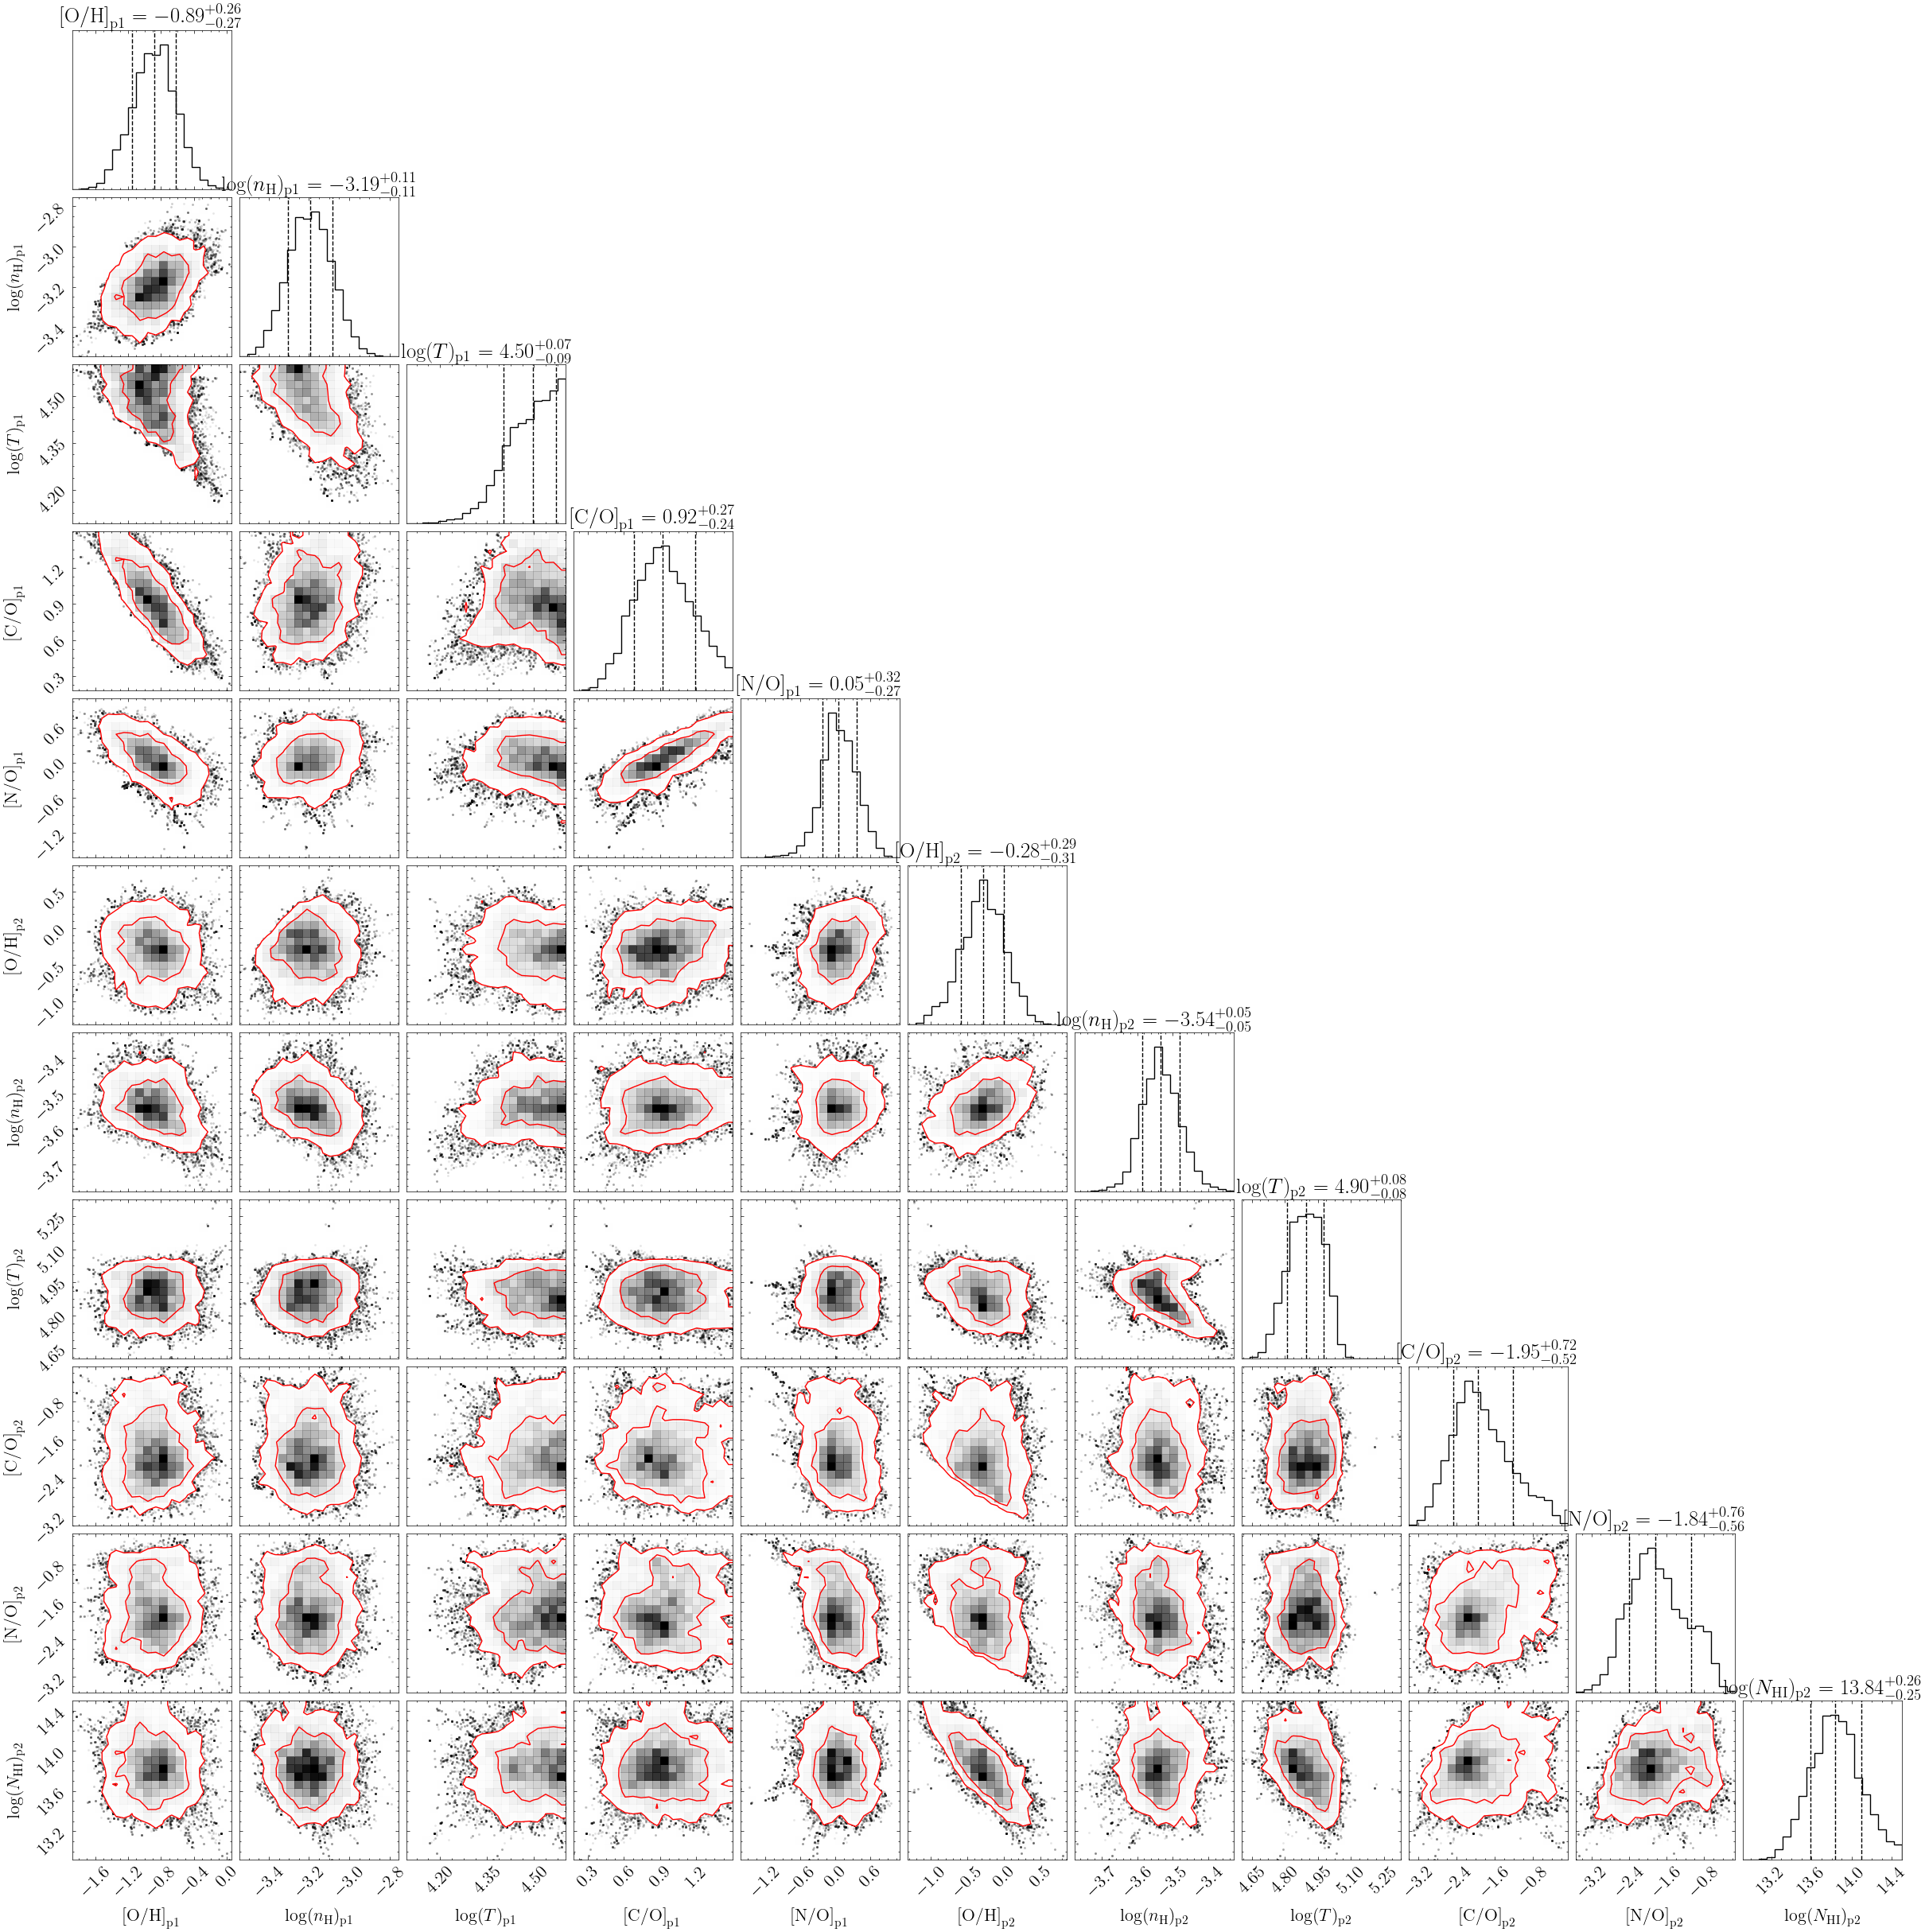

In [19]:
fig = corner.corner(
    flat_samples, quantiles = [0.16, 0.5, 0.84], show_titles=True, 
    labels=[r'$\mathrm{[O/H]}_\mathrm{p1}$',r'$\log(n_\mathrm{H})_\mathrm{p1}$',r'$\log(T)_\mathrm{p1}$',r'$\mathrm{[C/O]}_\mathrm{p1}$',r'$\mathrm{[N/O]}_\mathrm{p1}$',
            r'$\mathrm{[O/H]}_\mathrm{p2}$',r'$\log(n_\mathrm{H})_\mathrm{p2}$',r'$\log(T)_\mathrm{p2}$',r'$\mathrm{[C/O]}_\mathrm{p2}$',r'$\mathrm{[N/O]}_\mathrm{p2}$',
            r'$\log(N_\mathrm{HI})_\mathrm{p2}$'], 
    plot_density=True, levels=[0.68, 0.95], contour_kwargs={'colors':'red'}
);

In [20]:
np.percentile(flat_samples['logT_p1'], 100*cdf_3sig)

4.599828438792221

In [21]:
np.percentile(flat_samples['logN_HI_p2'], 100*(1-cdf_3sig)), np.percentile(flat_samples['logN_HI_p2'], 100*cdf_3sig)

(13.133567141543624, 14.489996069511909)

In [22]:
np.percentile(flat_samples['log_metals_p2'], 100*(1-cdf_3sig)), np.percentile(flat_samples['log_metals_p2'], 100*cdf_3sig)

(-1.1402503985654056, 0.5298067122475819)

In [23]:
np.percentile(flat_samples['C_O_p2'], 100*cdf_3sig), np.percentile(flat_samples['N_O_p2'], 100*cdf_3sig)

(-0.1888950109164011, -0.3100248950241508)

Make a plot

In [24]:
logN_dict = {
    #'HI':'14.5, -0.1, +0.2',
    'HeI':'<13.1',
    'CII':'<13.5',
    'CIII':'14.4, -0.1, +0.1',
    'CIV':'13.96, -0.01, +0.01',
    #'NII':'<13.5',
    'NIV':'13.1, -0.1, +0.1',
    #'NV':'<13.5',
    #'OII':'<13.5',
    'OIII':'14.29, -0.02, +0.02',
    'OIV':'14.67, -0.02, +0.02',
    'OV':'14.20, -0.04, +0.04',
    'OVI':'13.8, -0.2, +0.1',
    #'NeVI':'<13.8',
    #'NeVIII':'<13.8',
    #'MgII':'<11.4',
    #'MgX':'<13.9',
    #'AlII':'<11.2',
    #'AlIII':'<11.6',
    #'SiII':'<12.3',
    'SiIII':'<12.2',
    'SIV':'<12.8',
    'SV':'<12.4',}
    #'SVI':'<13.7',}
    #'FeII':'<11.8',}

In [25]:
b_dict = {'HI':'21, -3, +2',
          'CIII':'18.3, -0.3, +0.3',
          'CIV':'18.2, -0.3, +0.3',
          'NIV':'13, -5, +6',
          'OIII':'25, -2, +2',
          'OIV':'23, -1, +1',
          'OV':'26, -2, +2',
          'OVI':'13, -5, +7'}

In [26]:
p_grid = np.array(flat_samples)

yb_med_p1 = np.zeros(len(logN_dict))
yb_lo_p1 = np.zeros(len(logN_dict))
yb_hi_p1 = np.zeros(len(logN_dict))

yb_med_p2 = np.zeros(len(logN_dict))
yb_lo_p2 = np.zeros(len(logN_dict))
yb_hi_p2 = np.zeros(len(logN_dict))

yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    
    if ion in list(logN_dict.keys()):
        elem = ion_species_dict[ion].split('+')[0]

        y_samples_p1 = predict_col_dens_TDP(ion, p_grid[:,0], p_grid[:,1], p_grid[:,2], 14.5, logX_dict_TDP_interp)
        y_samples_p2 = predict_col_dens_TDP(ion, p_grid[:,5], p_grid[:,6], p_grid[:,7], p_grid[:,10], logX_dict_TDP_interp)
        
        if elem == 'C':
            y_samples_p1 += p_grid[:,3]
            y_samples_p2 += p_grid[:,8]
            
        if elem == 'N':
            y_samples_p1 += p_grid[:,4]
            y_samples_p2 += p_grid[:,9]
            
        y_samples = np.log10(10**y_samples_p1 + 10**y_samples_p2) 
        
        yb_med_p1[ctr] = np.median(y_samples_p1)
        yb_lo_p1[ctr] = np.percentile(y_samples_p1, 16)
        yb_hi_p1[ctr] = np.percentile(y_samples_p1, 84)
        
        yb_med_p2[ctr] = np.median(y_samples_p2)
        yb_lo_p2[ctr] = np.percentile(y_samples_p2, 16)
        yb_hi_p2[ctr] = np.percentile(y_samples_p2, 84)
        
        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

In [27]:
import matplotlib.lines as mlines

In [28]:
z_sys = 1.09456549

In [29]:
logN_res_dict = get_logN_residuals(logN_dict, yb_med, yb_lo, yb_hi)

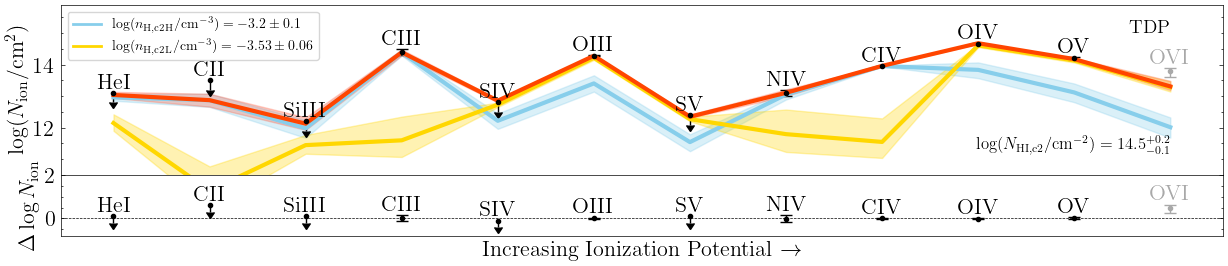

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(15,3.), gridspec_kw={'height_ratios': [2.8, 1]})

plot_column_densities_obs(logN_dict, fig, axes[0],
                          gray_out = ['OVI', 'NeVI'])

axes[0].plot(np.arange(len(logN_dict)), yb_med_p1, lw=3, color='skyblue')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p1, yb_hi_p1, color='skyblue', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med_p2, lw=3, color='gold')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p2, yb_hi_p2, color='gold', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

axes[0].set_ylim(10.5,15.9)

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c2H}/\mathrm{cm}^{-3}) = -3.2 \pm 0.1$'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c2L}/\mathrm{cm}^{-3}) = -3.53 \pm 0.06$'))
    
axes[0].text(len(logN_dict)-1, 15.0, r'TDP',fontsize=14, horizontalalignment='right')
axes[0].text(len(logN_dict)-1, 11.3, r'$\log(N_\mathrm{HI, c2}/\mathrm{cm}^{-2}) = 14.5_{-0.1}^{+0.2}$', fontsize=12,
            horizontalalignment='right')

axes[0].legend(handles=handles, loc='upper left', fontsize=10)

plot_column_densities_obs(logN_res_dict, fig, axes[1], gray_out = ['OVI', 'NeVI'])
axes[1].set_ylim(-.8,2.)
axes[1].axhline(0, linestyle='--', lw=.5)
axes[1].set_ylabel(r'$\Delta \log N_\mathrm{ion}$')

plt.subplots_adjust(wspace=0.12, hspace=0) 

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

In [31]:
logl_p1 = get_logl_TDP(p_grid[:,0], p_grid[:,1], p_grid[:,2], 14.5, logX_dict_TDP_interp)
logl_p2 = get_logl_TDP(p_grid[:,5], p_grid[:,6], p_grid[:,7], p_grid[:,10], logX_dict_TDP_interp)

Text(0.5, 0, '$\\log(l_\\mathrm{p1}/\\mathrm{kpc})$')

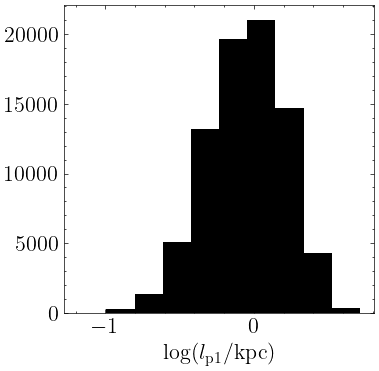

In [32]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl_p1)

ax.set_xlabel(r'$\log(l_\mathrm{p1}/\mathrm{kpc})$')

In [33]:
get_quantiles(logl_p1)

-0.04 -0.28 0.25


Text(0.5, 0, '$\\log(l_\\mathrm{p2}/\\mathrm{kpc})$')

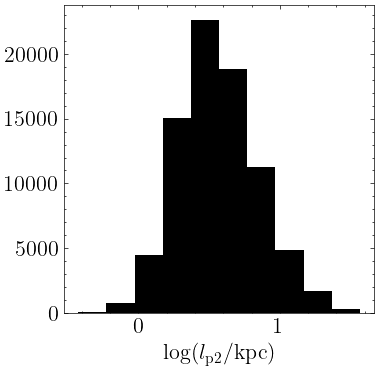

In [34]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.hist(logl_p2)

ax.set_xlabel(r'$\log(l_\mathrm{p2}/\mathrm{kpc})$')

In [35]:
get_quantiles(logl_p2)

0.55 -0.25 0.3


In [36]:
np.percentile(logl_p2, 100*(1-cdf_3sig)), np.percentile(logl_p2, 100*cdf_3sig)

(-0.18584698522519005, 1.4418047190969716)

In [37]:
np.log10(0.03*(10**-3.54/10**-3)**-1),np.log10(40*(10**-3.54/1e-3)**-0.5*(10**4.9/1e4)**0.5)

(-0.9828787452803375, 2.3220599913279627)

In [105]:
p_grid = np.array(flat_samples_mix)

# In PIE
yb_med_p1 = np.zeros(len(logN_dict))
yb_lo_p1 = np.zeros(len(logN_dict))
yb_hi_p1 = np.zeros(len(logN_dict))

# In TDP
yb_med_p2 = np.zeros(len(logN_dict))
yb_lo_p2 = np.zeros(len(logN_dict))
yb_hi_p2 = np.zeros(len(logN_dict))

# Total
yb_med = np.zeros(len(logN_dict))
yb_lo = np.zeros(len(logN_dict))
yb_hi = np.zeros(len(logN_dict))

ctr = 0

for i in range(len(ion_species_dict)):
    
    ion = list(ion_species_dict.keys())[i]
    
    if ion in list(logN_dict.keys()):
        s = ion_species_dict[ion] # Species, for PIE
        elem = ion_species_dict[ion].split('+')[0] # Element, for non-solar abundances

        
        # PIE prediction
        if ion != 'HI': # Note flipped order of density and metallicity wrt posterior for metals
            y_samples_p1 = species_logN_interp[s]((logN_HI_test*np.ones(len(p_grid[:,1])), p_grid[:,1], p_grid[:,0]))
        else:
            y_samples_p1 = logN_HI_test*np.ones(len(p_grid[:,1])) # HI
            
        y_samples_p2 = predict_col_dens_TDP(ion, p_grid[:,4], p_grid[:,5], p_grid[:,6], p_grid[:,9], logX_dict_TDP_interp)
        
        if elem == 'C':
            y_samples_p1 += p_grid[:,2]
            y_samples_p2 += p_grid[:,7]
            
        if elem == 'N':
            y_samples_p1 += p_grid[:,3]
            y_samples_p2 += p_grid[:,8]
            
        y_samples = np.log10(10**y_samples_p1 + 10**y_samples_p2) 
        
        yb_med_p1[ctr] = np.median(y_samples_p1)
        yb_lo_p1[ctr] = np.percentile(y_samples_p1, 16)
        yb_hi_p1[ctr] = np.percentile(y_samples_p1, 84)
        
        yb_med_p2[ctr] = np.median(y_samples_p2)
        yb_lo_p2[ctr] = np.percentile(y_samples_p2, 16)
        yb_hi_p2[ctr] = np.percentile(y_samples_p2, 84)
        
        yb_med[ctr] = np.median(y_samples)
        yb_lo[ctr] = np.percentile(y_samples, 16)
        yb_hi[ctr] = np.percentile(y_samples, 84)
        
        ctr += 1

In [106]:
logN_res_dict = get_logN_residuals(logN_dict, yb_med, yb_lo, yb_hi)

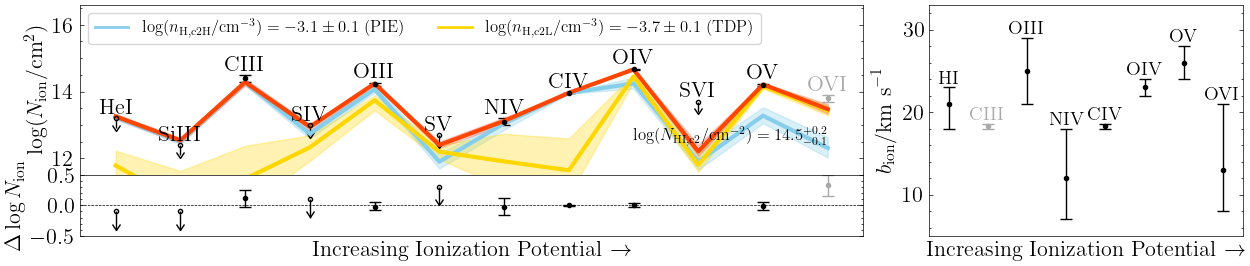

In [112]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                               figsize=(15,3.), gridspec_kw={'height_ratios': [2.8,1], 'width_ratios': [2.5, 1]})


plot_column_densities_obs(logN_dict, fig, axd['upper left'],
                          gray_out = ['OVI', 'NeVI'])

axd['upper left'].plot(np.arange(len(logN_dict)), yb_med_p1, lw=3, color='skyblue')
axd['upper left'].fill_between(np.arange(len(logN_dict)), yb_lo_p1, yb_hi_p1, color='skyblue', alpha=.3)

axd['upper left'].plot(np.arange(len(logN_dict)), yb_med_p2, lw=3, color='gold')
axd['upper left'].fill_between(np.arange(len(logN_dict)), yb_lo_p2, yb_hi_p2, color='gold', alpha=.3)

axd['upper left'].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
axd['upper left'].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

axd['upper left'].set_ylim(11.5,16.6)

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c2H}/\mathrm{cm}^{-3}) = -3.1 \pm 0.1$ (PIE)'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c2L}/\mathrm{cm}^{-3}) = -3.7 \pm 0.1$ (TDP)'))
    
axd['upper left'].text(len(logN_dict)-1, 12.5, r'$\log(N_\mathrm{HI, c2}/\mathrm{cm}^{-2}) = 14.5_{-0.1}^{+0.2}$', fontsize=12,
            horizontalalignment='right')

axd['upper left'].legend(handles=handles, loc='upper left', fontsize=12, ncol=2)

plot_column_densities_obs(logN_res_dict, fig, axd['lower left'], gray_out = ['OVI', 'NeVI'], label_ions=False, dy=.2)
axd['lower left'].set_ylim(-.5,.5)
axd['lower left'].axhline(0, linestyle='--', lw=.5)
axd['lower left'].set_ylabel(r'$\Delta \log N_\mathrm{ion}$')

plot_linewidth_obs(b_dict, fig, axd['right'], fs=14, gray_out=['CIII'])
axd['right'].set_xlim(-0.5, len(b_dict)-1+0.5)
axd['right'].set_ylim(5,33)

plt.subplots_adjust(wspace=0.12, hspace=0) 

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_PIE+TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_PIE+TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

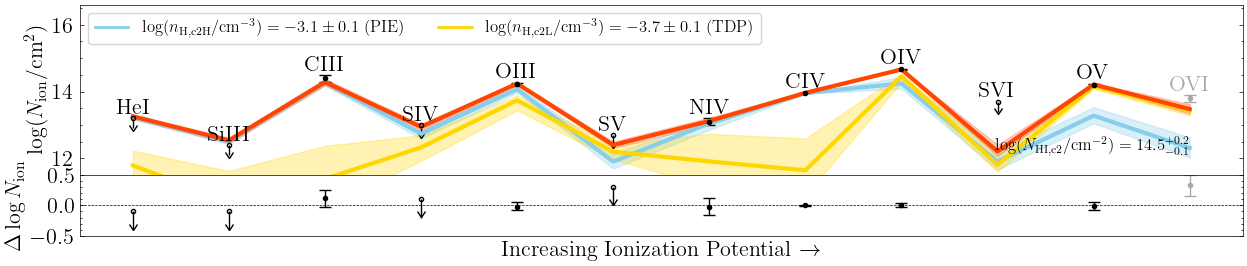

In [103]:
fig, axes = plt.subplots(2, 1, figsize=(15,3.), gridspec_kw={'height_ratios': [2.8, 1]})

plot_column_densities_obs(logN_dict, fig, axes[0],
                          gray_out = ['OVI', 'NeVI'])

axes[0].plot(np.arange(len(logN_dict)), yb_med_p1, lw=3, color='skyblue')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p1, yb_hi_p1, color='skyblue', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med_p2, lw=3, color='gold')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo_p2, yb_hi_p2, color='gold', alpha=.3)

axes[0].plot(np.arange(len(logN_dict)), yb_med, lw=3, color='orangered')
axes[0].fill_between(np.arange(len(logN_dict)), yb_lo, yb_hi, color='tomato', alpha=.3)

axes[0].set_ylim(11.5,16.6)

handles = []

handles.append(mlines.Line2D([], [], lw=2,
                             color='skyblue', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c2H}/\mathrm{cm}^{-3}) = -3.1 \pm 0.1$ (PIE)'))

handles.append(mlines.Line2D([], [], lw=2,
                             color='gold', 
                             marker='None',
              linestyle='-', markersize=8, label=r'$\log(n_\mathrm{H, c2L}/\mathrm{cm}^{-3}) = -3.7 \pm 0.1$ (TDP)'))
    
#axes[0].text(len(logN_dict)-1, 15.0, r'TDP',fontsize=14, horizontalalignment='right')
axes[0].text(len(logN_dict)-1, 12.2, r'$\log(N_\mathrm{HI, c2}/\mathrm{cm}^{-2}) = 14.5_{-0.1}^{+0.2}$', fontsize=12,
            horizontalalignment='right')

axes[0].legend(handles=handles, loc='upper left', fontsize=12, ncol=2)

plot_column_densities_obs(logN_res_dict, fig, axes[1], gray_out = ['OVI', 'NeVI'], label_ions=False, dy=.2)
axes[1].set_ylim(-.5,.5)
axes[1].axhline(0, linestyle='--', lw=.5)
axes[1].set_ylabel(r'$\Delta \log N_\mathrm{ion}$')

plt.subplots_adjust(wspace=0.12, hspace=0)   

#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_PIE+TDP.pdf'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)
#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Ions/z={}/z={}_PIE+TDP.png'.format(z_sys, str(z_sys).replace('.', '_')), dpi=150)

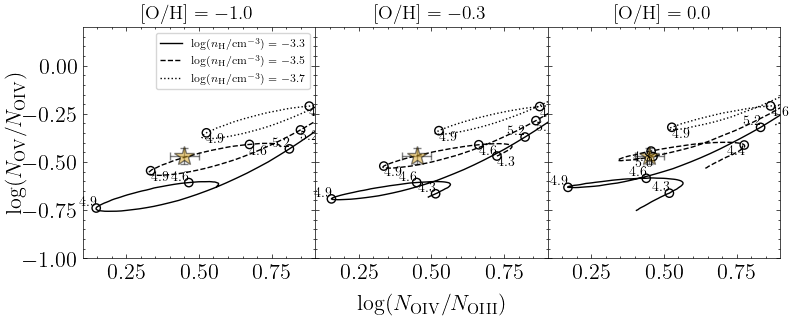

In [13]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=-1.0$', fontsize=14)

scat_logN_ratio(axes[1], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[O/H]}=-0.3$', fontsize=14)

scat_logN_ratio(axes[2], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[O/H]}=0.0$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{OV}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = -1.0

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -1.0, -3.3, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -1.0, -3.5, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -1.0, -3.7, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = -0.3

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -0.3, -3.3, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -0.3, -3.5, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      -0.3, -3.7, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      ':', 'left', 'top')

# metals = 0.0

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.0, -3.3, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.0, -3.5, 
                      4.0, 5.3, .01,
                      4.15, 5.3, .3,
                      .1, .9, -1, 0.2,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.0, -3.7, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, 0.2,
                      ':', 'left', 'top')

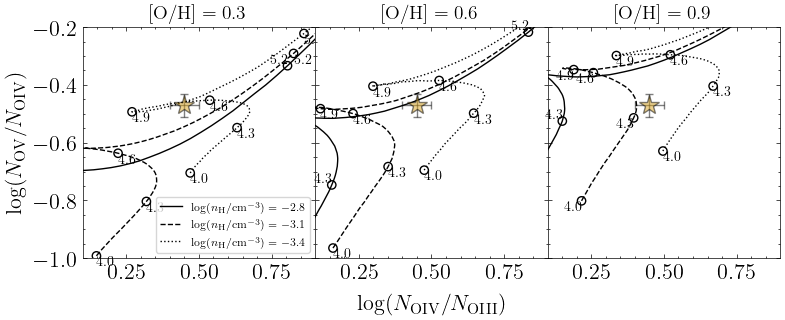

In [14]:
fig, axes = plt.subplots(1,3,figsize=(3*3,3), sharex=True, sharey=True)

# Plot measurements

scat_logN_ratio(axes[0], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[0].set_title(r'$\mathrm{[O/H]}=0.3$', fontsize=14)

scat_logN_ratio(axes[1], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[1].set_title(r'$\mathrm{[O/H]}=0.6$', fontsize=14)

scat_logN_ratio(axes[2], 'OIV/OIII', 'OV/OIV', logN_ratio_dict)
axes[2].set_title(r'$\mathrm{[O/H]}=0.9$', fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log(N_\mathrm{OIV}/N_\mathrm{OIII})$', labelpad=25)
ax_label.set_ylabel(r'$\log(N_\mathrm{OV}/N_\mathrm{OIV})$', labelpad=40)

plt.subplots_adjust(wspace=0, hspace=0.0)

# Plot tracks
# metals = 0.3

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.3, -2.8, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.3, -3.1, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[0], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.3, -3.4, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      ':', 'left', 'top')

axes[0].legend(fontsize=8)

# metals = 0.6

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.6, -2.9, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.6, -3.1, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      '--', 'left', 'top')

plot_logN_ratio_track(axes[1], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.6, -3.4, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      ':', 'left', 'top')

# metals = 0.9

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.9, -2.8, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      '-', 'right', 'bottom')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.9, -3.1, 
                      4.0, 5.3, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      '--', 'right', 'top')

plot_logN_ratio_track(axes[2], 'OIII', 'OIV', 'OIV', 'OV', logX_dict_TDP_interp,
                      0.9, -3.4, 
                      4.0, 5.5, .01,
                      4.0, 5.3, .3,
                      .1, .9, -1, -.2,
                      ':', 'left', 'top')